In [2]:
from jinja2.loaders import split_template_path
from langchain_community.document_loaders import ConfluenceLoader
from langchain_community.document_loaders.confluence import ContentFormat

## Trial approaches to find the best content scraped from confluence

In [3]:
from pprint import pprint
def display(_docs, idx: int):
    pprint(_docs[idx].metadata)
    print("\n")
    print(_docs[idx].page_content)

In [21]:
loader = ConfluenceLoader(
    url="https://openimis.atlassian.net/wiki/",
    space_key="OP",
    include_comments=False,
    include_attachments=False,
    include_restricted_content=False,
    max_pages=5,
    limit=100,
    content_format=ContentFormat.ANONYMOUS_EXPORT_VIEW,
    keep_markdown_format=True,
    keep_newlines=True
)
anonymous_export_view_docs = loader.load()

In [22]:
display(anonymous_export_view_docs, 4)

{'id': '40468517',
 'source': 'https://openimis.atlassian.net/wiki/spaces/OP/pages/40468517/Tanzania+-+Mainland',
 'title': 'Tanzania - Mainland',
 'when': '2024-07-24T13:03:54.688Z'}



## Overview

| **Country/Region** | Tanzania - Mainland |
| --- | --- |
| **Solution** | Health Insurance |
| **Program Operator** | President’s Office Regional Administration and Local Government (PORALG) |
| **Program type** | Community Health Fund (Government run Voluntary Health Insurance programme) |
| **Implemented since** | 2012 |
| **Implementing Partner(s)** | [Swiss TPH](https://openimis.atlassian.net/wiki/spaces/OP/pages/835682333/Swiss+TPH) |
| **Supporting Partner(s)** | Financial Assistance: [Swiss Agency for Development and Cooperation](https://openimis.atlassian.net/wiki/spaces/OP/pages/938868746) |
| **Version** | v1.5.1 (build 2021.4.12.1030) |
| **Functionalities used** | * Beneficiary Management * Claims Management * Claims Review * Reports |
| **Coverage** | 26 regions |
| **Number

In [17]:
from langchain.text_splitter import MarkdownHeaderTextSplitter

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [23]:
markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)

result_docs = []
for doc in anonymous_export_view_docs:
    md_doc = markdown_splitter.split_text(doc.page_content)
    for i in range(len(md_doc)):
        md_doc[i].metadata = md_doc[i].metadata | doc.metadata
    result_docs.extend(md_doc)

In [25]:
len(result_docs)

22

In [30]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=4000,
    chunk_overlap=50,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""]
)

split_result_docs = splitter.split_documents(result_docs)

<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
C:\Users\gopig\AppData\Local\Temp\ipykernel_46492\3525173431.py:6: SyntaxWarning: invalid escape sequence '\.'
  separators=["\n\n", "\n", "(?<=\. )", " ", ""]


In [31]:
split_result_docs[-1]

Document(metadata={'Header 2': 'Integration and interoperability', 'title': 'Tanzania - Mainland', 'id': '40468517', 'source': 'https://openimis.atlassian.net/wiki/spaces/OP/pages/40468517/Tanzania+-+Mainland', 'when': '2024-07-24T13:03:54.688Z'}, page_content="The system is currently being integrated with other government systems including:  \n· SMS gateway solution to allow enrollment, renewals and payment confirmations to clients.  \n· GEPG (Government e-Payment Gateway) solution.  \n· USSD gateway for mobile requests (enquiring, renewal, request control numbers for mobile or bank payments).  \nDiscussions are ongoing for integration of IMIS with the government's GoTHOMIS (Government of Tanzania Hospital Management Information System) system to link health facility claims coming directly to IMIS, as well as the CHF accounting system.In the next phase of the project, integration with other systems will be undertaken based on government-identified priorities.")

In [6]:
loader = ConfluenceLoader(
    url="https://openimis.atlassian.net/wiki/",
    space_key="OP",
    include_comments=False,
    include_attachments=False,
    include_restricted_content=False,
    max_pages=5,
    limit=100,
    content_format=ContentFormat.EDITOR
)
editor_docs = loader.load()

In [7]:
display(editor_docs, 1)

{'id': '4620337',
 'source': 'https://openimis.atlassian.net/wiki/spaces/OP/pages/4620337/Getting+started+...',
 'title': 'Getting started ...',
 'when': '2020-07-23T09:53:12.107Z'}


... as a potential user of openIMIS ... as a local openIMIS implementer ... as a member of the global openIMIS Implementers Committee ... as an independent developer ... as a member of the global openIMIS Developers Committee ... as a member of the Technical Advisory Group


In [8]:
loader = ConfluenceLoader(
    url="https://openimis.atlassian.net/wiki/",
    space_key="OP",
    include_comments=False,
    include_attachments=False,
    include_restricted_content=False,
    max_pages=5,
    limit=100,
    content_format=ContentFormat.VIEW
)
view_docs = loader.load()

In [9]:
display(view_docs, 1)

{'id': '4620337',
 'source': 'https://openimis.atlassian.net/wiki/spaces/OP/pages/4620337/Getting+started+...',
 'title': 'Getting started ...',
 'when': '2020-07-23T09:53:12.107Z'}


... as a potential user of openIMIS The best way to get started with openIMIS is a test-run on the Demo server . A look at the Documentation might help you on your test run. ... as a local openIMIS implementer do everything a potential user of openIMIS would do. If you like what you see on the demo server, you could consider checking the Open source license , to see if the conditions (no license cost) are agreeable for you. Follow the installation guide , to set up you own instance. If you feel that you can handle the process, you might want to help to set up an openIMIS implementation for a real health financing organisation you know. Just go ahead - there is currently no certificate or license required for openIMIS implementers. If you need help beyond the available documentation, feel free to contact o

In [11]:
[export_view_docs[i].page_content == view_docs[i].page_content for i in range(5)]

[True, False, True, True, True]

False

In [20]:
from langchain_text_splitters import MarkdownHeaderTextSplitter

markdown_document = "# Intro \n\n    ## History \n\n Markdown[9] is a lightweight markup language for creating formatted text using a plain-text editor. John Gruber created Markdown in 2004 as a markup language that is appealing to human readers in its source code form.[9] \n\n Markdown is widely used in blogging, instant messaging, online forums, collaborative software, documentation pages, and readme files. \n\n ## Rise and divergence \n\n As Markdown popularity grew rapidly, many Markdown implementations appeared, driven mostly by the need for \n\n additional features such as tables, footnotes, definition lists,[note 1] and Markdown inside HTML blocks. \n\n #### Standardization \n\n From 2012, a group of people, including Jeff Atwood and John MacFarlane, launched what Atwood characterised as a standardisation effort. \n\n ## Implementations \n\n Implementations of Markdown are available for over a dozen programming languages."

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
]

# MD splits
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on, strip_headers=False
)
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits

[Document(metadata={'Header 1': 'Intro', 'Header 2': 'History'}, page_content='# Intro  \n## History  \nMarkdown[9] is a lightweight markup language for creating formatted text using a plain-text editor. John Gruber created Markdown in 2004 as a markup language that is appealing to human readers in its source code form.[9]  \nMarkdown is widely used in blogging, instant messaging, online forums, collaborative software, documentation pages, and readme files.'),
 Document(metadata={'Header 1': 'Intro', 'Header 2': 'Rise and divergence'}, page_content='## Rise and divergence  \nAs Markdown popularity grew rapidly, many Markdown implementations appeared, driven mostly by the need for  \nadditional features such as tables, footnotes, definition lists,[note 1] and Markdown inside HTML blocks.  \n#### Standardization  \nFrom 2012, a group of people, including Jeff Atwood and John MacFarlane, launched what Atwood characterised as a standardisation effort.'),
 Document(metadata={'Header 1': 'In

In [32]:
x = b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xed\x00\x00\x02+\x08\x02\x00\x00\x00\x8c\x01\x89X\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00 \x00IDATx\x9c\xec\xddw\\\x13\xf7\xff\x07\xf0O\x06!\x90\x84\x15\xf6\xde \xa2\x80\x82\x15\'VP@\x1c \x8e\xbaW\x1d\xb5Z\xab\x96Z\xc5J\xfbU\xb4j\xabu\xd5A\x9d\xa8\x80[\x11D\x11\xdc\xa0\xa0\xe2^ C6$a%d\xe7\xf7\xc7\xf9\x8bT\x11\x10\x02\x9f\xe4\xf2y>\xfc\x03.\x97\xcb;\xe1\xe5\'\x9f\xfb\xdc\xdd\xe7\x082\x99\x0c \x88\x8a#\xc2.\x00A\x14\x00\xe5\x18\xc1\x03\x94c\x04\x0fP\x8e\x11<@9F\xf0\x00\xe5\x18\xc1\x032\xec\x02\x94\x9dH \xab*\x11p\xeb\xc4\xbcZ\xb1D\x02D\x02)\xec\x8a\xdaDC\x93\xa0\xcd \xd3tH:\x06\x1a\xbaF\x1a\xb0\xcb\xe9t\x044~\xdc,>W\xfa*\xbb.\xff\x19\x97]&\xd45\xd6\xa0\xe9\x90i:d\x1d&Y\xc8W\x8d\x1c\x8bE2n\x8d\x98[\'&S\x885U"\xfb\x1e4\xfb\x1et\x13kM\xd8uu\x16\x94\xe3f\xdc\xb9\xc0*\xcb\xe7\x1b[i\xda\xb9\xd3,\x9d\xb4`\x97\xd3Q\xecra\xfeS.\xa7R\xc4\xe7I\xfa\x850\rL)\xb0+R<\x94\xe3\xffx\x99U\x9fz\xac\xc27\x84\xd9{\xa8>\xecZ\x14/\xff\x19\xf7\xce\x05\x96}w\x9a\xefH&\xecZ\x14\x0c\xe5\xf8\x83\x9bg\xaa\x89$\xd0\x7f\x94!\xecB:W\xde#n\xd6e\xd6\xc4\x9f\xaca\x17\xa2H(\xc7\xef];Q\xa5g\xac\xe19X\x0fv!]\xa1\xbaD\x18\xf7g\xd1\xc2\xcd\x8e\x04\xbc\x8cW\xa1\x1c\x03\x00\xc0\x85}\xa5\xd6.4\x8fA\xba\xb0\x0b\xe9:2\x19\xd8\xb94\xf7\xfb-\x8e\xb0\x0bQ\x0c\x94c\x90q\x91E\xd1$\xf6\xf6\xc7a\x87\xb8e\xac2\xe1\xe5#\xe5\xdfD\xe0\xa1\x83\x81\x97\xef\x95\xf6\xca{\xcc\x95J\x80\x1a\x86\x18\x00\xc04\xa3|\x15\xc4\xbc}\xae\x1av!\n\xa0\xee9\xbe~\xb2\xd2\xcbO-\xfa\xc4\xcd\xb2\xefA+\xcem\xac|\'\x80]HG\xa9u\x8es\xae\xd78y1\xb4uH\xb0\x0b\x81\xa9\xffH\xc3;\x17T\xbeIV\xeb\x1c\x17<\xe5\x0e\xe8\xaaQ\xb6\xb2\xb2\xb2\xd2\xd2RXOo\x81\xa5\xb3\x96\x9e\x11\xa58\xb7\xb136\xdee\xd47\xc7\x85/x$\r\x02\xa1K\xda\xe2\xe2\xe2\xe2Q\xa3F=\x7f\xfe\x1c\xca\xd3[\xc54\xa7\xe4\xe64t\xd2\xc6\xbb\x86\xfa\xe68\xff)\xd7\xae;\xadk^K,\x16\xb7o\\\x08{V\xbb\x9f\xdeF\xf6\xee\xf4\xfc\'\xaa\x9dc\xf5\x1dw;\xb3\xa3$p\xba\xa9\x16C\xc1\r2\x9f\xcf\xdf\xb0a\xc3\x8d\x1b7\x00\x00^^^\xcb\x97/\x97\xc9d\xa3F\x8d\x92\xaf\x10\x12\x12\x12\x15\x15UQQ\xb1k\xd7\xae\xdb\xb7o744\xd8\xd8\xd8\xcc\x9c9300\x10[a\xfc\xf8\xf1\x0e\x0e\x0e\x0e\x0e\x0eqqq|>\xff\xc0\x81\x03\xdf|\xf3\xcdGOWl\xcd\x00\x80\xe4\x03\xe5\xbd\x86\xea\xab\xee\x89Djz\xde\xa6X(\xab(\xe2+<\xc4\x00\x80\x03\x07\x0e$&&\xce\x9f?\xdf\xd0\xd0011QKKK[[{\xed\xda\xb5\x91\x91\x91\xf3\xe7\xcf\xf7\xf6\xf6600\xc0\x9a\xd8g\xcf\x9e\x85\x87\x87\xeb\xe9\xe9\xa5\xa5\xa5EFFZYYu\xef\xde\x1d\xdbHFF\x06\x9f\xcf\xdf\xb2e\x0b\x8f\xc7\xb3\xb1\xb1\xf9\xf4\xe9\nG"\x13j\xab\x84(\xc7*\x86[\'\xa6\xe9v\xca{/--\xd5\xd2\xd2\x9a1c\x06\x99L\x1e3f\x0c\xb6\xd0\xd5\xd5\x15\x00`kk\xeb\xe9\xe9\x89-\xb1\xb0\xb08q\xe2\x04\x81@\x00\x00\x8c\x1e=\xda\xdf\xdf\xff\xda\xb5k\xf2\x1c\x93\xc9\xe4\xe8\xe8h--\xad\xcf=]\xe1h\xba$n\x9d\xa4\x936\xde\x05\xd4\xb4\x7f\xcc\xad\x93t\xd2p[PP\x10\x9f\xcf_\xb4hQnnn\xcbk\xbe~\xfdz\xe9\xd2\xa5\x81\x81\x81\xa1\xa1\xa1\x12\x89\x84\xc5b\xc9\x1frww\x97\x87\xb8k\xd0t\xc8\xdc:qW\xbe\xa2b\xa9i\x8eeR\xa0I\xed\x94\x1c\xf7\xeb\xd7\xef\xef\xbf\xfff\xb1X\x13\'N\\\xbbv\xadX\xdc|8\xb2\xb2\xb2\xa6O\x9f.\x14\n\xd7\xacY\xb3q\xe3F]]]\xa9\xf4\xc3\x19\xfa]\x1cb\x00\x00Y\x83\x80}9\xa8(5\xedWh3H\xb5\xd5\xc2N\xdax\xbf~\xfd\xfa\xf6\xed{\xfc\xf8\xf1-[\xb6\x98\x99\x99\xcd\x9e=\xfb\xd3ubbb,--\xb7n\xddJ&\x93\xa1\x04\xf7#\xf5\x1c1U[\x85\x1b5\x15.\xbd#h:\x9d\xd5\x1d\x14\n\x85\x00\x00"\x918y\xf2d##\xa3\x97/_\x02\x00\xa8T*\x00\xa0\xaa\xaaJ\xbeZMM\x8d\xb3\xb33\x16b\xa1P\xc8\xe3\xf1\x9a\xb6\xc7\x1f\xf9\xf4\xe9\n\xc7\xad\x13\xd3tT\xb8QS\xe1\xd2;\x82\xa2E4\xb1\xa6\x8a\x052\xb2\xa6\x82\xbfL\xe3\xe2\xe2\xae_\xbf\x1e\x1c\x1c\\UUUUU\xe5\xe6\xe6\x06\x00011\xb1\xb0\xb0\x88\x8d\x8d\xd5\xd2\xd2\xaa\xad\xad\x9d8q\xa2\xb7\xb7\xf7\x85\x0b\x17\xce\x9d;\xa7\xab\xab{\xf4\xe8\xd1\xba\xba\xba\xbc\xbc<\x99L\xd6\xec\x97\xfb\xa7O\xd7\xd4T\xf0\xc0\x02\x89D\xd0a\xaa\xf0\xe5\xa8j\xda\x1e\x03\x00\xb4\x18\xa4\xbc\xa7\x8a\x1f\xfc\xb7\xb4\xb4\x14\n\x85[\xb6l9{\xf6\xec\xc4\x89\x13\xa7N\x9d\n\x00 \x10\x08\xd1\xd1\xd14\x1am\xf3\xe6\xcd\x17.\\`\xb3\xd9\x0b\x16,\xf0\xf5\xf5\xdd\xb4i\xd3\xc6\x8d\x1b\xbf\xfa\xea\xab?\xfe\xf8\xa3\xba\xba:;;\xbb\xd9m~\xfat\xc5\xd6,\x12\xc8^?\xa87w\xa0*v\xb3]I}\x8f\x83\xbcy\xd8\xf0\xf6q\xc3\xf0\xe9\xa6\xb0\x0b\x81\xef\xd5\xfd\xfa\xc2\x17\xbcaSL`\x17\xd2~j\xda\xaf\x00\x00\xd8u\xa7=\xcb\xa8my\x1d??\xbff\x97\xeb\xeb\xebs8\x9cO\x97\x0f\x1e<\xf8\xb7\xdf~SP\x81\x9f\xb5c\xc7\x8e\x93\'O~\xba\x9c\xc1`\xd4\xd7\xd7\x7f\xba\x9cL&\xa7\xa6\xa6\xb6\xb0\xc1\xaaw\x02\'\x0f\xbaBk\xecj\xea\xdb\x1ec\xd7\xf7kj\x13[\xb84\xfas\xa7\x98\x89D"\r\x8dfz\x93ZZZ\xfa\xfa\x9d~J~mm-\x97\xcbm\xfb\xfa\x04\x02\xc1\xcc\xcc\xecs\x8f\xb2\xcb\x85\x97\x0e\x95O\xfaY\xb5\xaf\nQ\xeb\x1c\x03\x00v\xfc\x88\x9fk\xd4\xda\xe7\xc2\xbe\xd2\x1e\xfd\xf5l\xdd\xb4a\x17\xd2!\xea\xbb\x9f\x87\x19<\xd6\xe8aZ3=\x045QQ\xc8\xd7\xa2\x91T=\xc4(\xc7\xa0\xc7\x00\xdd\x8a"\x81\xaa\x9f}\xdb>b\x91\xec\xf4\xce\x12\xffI*\xbc{\'\xa7\xee9\x06\x00\x04\xce0\xcdLbU\x16\xa9\xfc5j_\xea\xd8\x1fE\x93pq\xb14\xea\x1f\xff?\x198\xb9\xad\xb8o\x10\xd3\xd2Y\xe5gsk\x0b\x99\x14\xc4\xae/\x0c\xff\xc1R\x8b\x8e\x93k\x13Q\x8e?8\xbb\xab\xc4\xc9\x8b\xd1\xddW\x07v!\x9d\xab\xbaT\x18\xbf\xb9h\xd2\xcf\xd6\xfa&\xf8\x99\xb0\x10\xe5\xf8?\xee&\xb1\xf3\x9e4\xf4\x1bi\x88\x83]\x9fO\xd5\xb1\xc4w\x12\xab\x89D\xc2\xb0\xa9x\xe8\x137\x85r\xfc1V\x99\xf0Nb\xb5\xa6\x16\xc9\xc2Q\xcb\xde\x9d\x86\x8fo\xde\xfcg\xdc\xcaB\xfe\xab\xfb\xf5\xbe#\r\x9d<U\xfb\x90G\xb3P\x8e\x9bW\xfa\x96\xff2\xab.\xff)\xd7\xc0\x84\xa2oJ\xd1f\x90\xb4\x19$\xba\xae\x86X\xac"\xf3x\x0be\xdc:1\xafN"\x93\x82\xc7\xb7jl\xbb\xd3\x9c\xbc\x18.\xbdq\x98`\x0c\xcaq+*\n\x05\x95\xc5|^\x9d\x84W/&\x12\t\xbc\x06\x05\x9f\xed\xf9\xe8\xd1#ggg\x85\x9f\x7fL\xa1\x12\xb5h$m\x1d\x92\x9e!\xc5\xd6M\x1b\xa8\xf0)\xf2m\x82r\x0cYxx\xf8\xe6\xcd\x9bmmma\x17\xa2\xda\xd0\xf81\x82\x07(\xc7\x08\x1e\xa0\x1cCfkk\xab\xd2\x17x*\t\x94c\xc8\n\n\n\xd0.J\xc7\xa1\x1cC\xc6`0`\x97\x80\x07(\xc7\x905{\x05\x07\xf2\xa5P\x8e!c2\xf1v+;(P\x8e!k:\x1d\x16\xd2n(\xc7\x909::\xa2\xf1\x8a\x8eC9\x86,77\x17\x8dWt\x1c\xca1d\xd8\x9cWH\x07\xa1\x1cC\xc6\xe7\xf3a\x97\x80\x07(\xc7\x08\x1e\xa0\x1cC\xe6\xe0\xe0\x80\xf6\xf3:\x0e\xe5\x182l\x9aM\xd8U\xa8<\x94c\x04\x0fP\x8e!\xd3\xd1\xc1\xf9\xe5\xd9]\x03\xe5\x18\xb2\xba\xba:\xd8%\xe0\x01\xca1d\xe8\xfcc\x85@9\x86\x0c\x9d\x7f\xac\x10(\xc7\x08\x1e\xa0\x1cC\x86\xce\xa3W\x08\x94c\xc8\xd0y\xf4\n\x81r\x8c\xe0\x01\xca1\x82\x07(\xc7\x90\xa1\xf3+\x14\x02\xe5\x182t~\x85B\xa0\x1c#x\x80r\x8c\xe0\x01\xca1d\xda\xda8\x9c\xf8\xbe\xeb\xa1\x1cC\xc6\xe3\xf1`\x97\x80\x07(\xc7\x08\x1e\xa0\x1cCfnn\x8e\xc6\xdd:\x0e\xe5\x18\xb2\xd2\xd2R4\xee\xd6q(\xc7\x08\x1e\xa0\x1cCF"\xe1\xe1\xbef\xd0\xa1\x1cC&\x91(\xf8\x06P\xea\t\xe5\x1824O\xa1B\xa0\x1cC\x86\xe6)T\x08\x94c\xc8lllP{\xdcq\xe8>\x90p\x04\x06\x06R(\x14\x02\x81P^^n``\xa0\xa1\xa1A \x10(\x14\xca\x89\x13\'`\x97\xa6\x92\xc8\xb0\x0bPS\x0c\x06#??\x1f\xfb\xb9\xaa\xaa\n\x00\xa0\xa9\xa9\xb9|\xf9r\xd8u\xa9*\xd4\xaf\x80c\xc0\x80\x01\x1fu\',,,BCC\xe1U\xa4\xdaP\x8e\xe1\x18;v\xac\x8d\x8d\x8d\xfcWMM\xcd\x89\x13\'B\xadH\xb5\xa1\x1c\xc3aii\xd9\xaf_?\xf9\xce\x89\x95\x95UXX\x18\xec\xa2T\x18\xca14\xe3\xc6\x8d\xb3\xb2\xb2\x02\x00P(\x94\xf0\xf0p\xd8\xe5\xa86\x94ch\xac\xac\xac|}}e2\x99\x95\x95\x15\xcaq\x07\xe1g\xbc\xa2\xa6J\xc4\xa9\x10J$\xaa4\x8c\xe8\xe73\xf1E6g\x98\xff\xb0\xdcG\r\xb0k\xf9\x02\x04\x00\xe8\xfa\x1aLS\n\x99\xa2,#\xdfx\x18?.|\xce{x\xad\xa6\x8e-\xb2r\xa15\xd4\x8aa\x97\x83\x7f\x1a\x1a\xc4\xdaj\x81H u\xea\xc5\xf8*\xd0\x00v9\x00\x0f9~\xf7\xaa13\x99\x150\xc5\x92\xa4\x01\xbb\x14\xf5\xf3 \x95E$\xca\x06\x86\x1a\xc2.D\xc5\xfb\xc7\xe5\x05\xfc;\x17X\x813Q\x88\xe1\xe8\xe5\xcf\x94\x11\x08w.\xc0\xbf\xb5\xb0j\xe7\xf8\xfe\xd5\x9a\xbe#\x8daW\xa1\xd6\xbc\x860\xcb\n\xf8\xf5\x1c\xc8\xdd9\xd5\xceq\xd1K\xae\xae!j\x8a!#\x12\t\x9c\n!\xe4\x1a\xe0\xbe|G\xf0\xea\xa4\x06\xa6\x9a$\xb2\xb2\xec2\xab-=c\nj\x8f;\x80 k\xa8\x15\xc1.\x02\x01b\xa1L*\x85<Z\xa0\xca9F\x90\xff\x87r\x8c\xe0\x01\xca1\x82\x07(\xc7\x08\x1e\xa0\x1c#x\x80r\x8c\xe0\x01\xca1\x82\x07(\xc7\x08\x1e\xa0\x1c#x\x80r\x8c\xe0\x01\xca1\x82\x07(\xc7\xed\xf7\xfc\xc5S\x81@\x00\xbb\x8a\x8e\x8a\xfcu\xd9\xbc\xf9S`W\xd1Q(\xc7\xedt)\xe5\xc2\xc2\xefg\xf0\xf9\x8d\xb0\x0bA\x00\xcaq\xfb\xb5\xbb%\xee\xfa\x0b\xc9T\xfd\xd2\xb5\xb6\xc0\xcf\xf5\xd2\xad*//\xfbf\xf2\xc8eKW\x85\x8cx?\xfd\xd4\xc1C{\x8f\x1d?p">YWW\xefaN\xf6\xbe\x98\x1dyy\xaf\xf5\xf5\r\xbc<}\xe6\xcc^\xc8d\xbe\xbf\xec,)\xf9\xdc\xe93qEE\x05t:\xa3\x9f\xef\xa0\xd9\xb3\xbe\xbb{\xef\xf6\xd6\xbf7\x00\x00\xc6\x84\xf9\x03\x00~\x8eX\x138|$\x00\xe0\xf2\xe5\x8bG\x8f\x1f(--f2\rG\x04\x87N\x9e4\x93H$\xd6\xd6\xd6\x8c\t\xf3\x9f?\xef\x877\xb9\xafn\xdf\xbe\xe6\xe4\xe4\xbamk\xcc\xe7\x8a|\xf7\xaep\xcb\xd6\xf5/^>e0t\xfa~5`\xc9\x0f+\x88D"\x00\xe0\xdc\xf9\x93\t\'b\xab\xab+MM\xcd\x87~\x1d8a\xfcTMMM\xa1Px\xf8\xc8\xbe\xb4\xb4\x94\xca\xaa\n&\xd3pX\xc0\x88\x19\xd3\xe7a\x13\xdc\xcf\x9c=\xde\xce\xd6\xc1\xd6\xd6\xe1\xf4\x998\x81\x80\x7f"\xfe\x12\x9dN\x7f\xf2$\xe7\xd0\xe1\xbd\xcf_<\x01\x00xx\xf4\x9e9c\xbe\xb3\x93\xab\xfc\xa3\xb8\x90xJ"\x91\xf8\r\xf6\xffn\xc1R\n\x85\xd2%\x7f\x13\x85Q\xa3\x1c\x9b\x9a\x9a99\xba\\\xberQ\x9e\xe3+\xa9I\x83\x07\xfb\xeb\xea\xea\xdd\x7fpo\xc5/\x8b\x03\xfc\x83C\xc7L\xa8\xaf\xab=u\xfa\xf8\xd2\xe5\xf3\xf7\xfc\x13K\xa5R\x0f\x1e\xdas\xe8\xf0>\xbf\xc1\xfe\xe3\xc6N\xe6\xd4\xb0\xb3\xb22\xc8\x1a\x1a_\xf5\xe9?~\xdc\x94\x84\x13\xb1\xeb\xd7m\xa5\xd1\xe8\x96\x96\xd6\x00\x80\x94\x94\xc4\r\x1b\xa3\x86\x0e\r\x9c=\xeb\xbb\xe7\xcf\x9f\xec?\xf0\x0f\x00`\xea\x94\xd9\xd8k\xc5\xc6\xfe;z\xf4\xb8?7\xefn\xf9F\n\x9b\xfe\xfc_QQ\xc1\xc2\xef\x96\xf1x\xdc\x879\xd9X\x88\x0f\x1e\xda{\xe2dlX\xe8D\x1b\x1b\xfbw\xef\n\xe2\x13\x0e\x17\x97\x14\xad\\\xf1;\x89D\xba\x7f\xff\xaeo\xbfA\xe6f\x96\xb9\xb9\xafb\x8f\xeeg0t\xc6\x8f{\xdf\xd9\xcd\xca\xca\xe0\x0b\xf8\xd1k\xb7\xf0\x1ayt:=+;\xf3\x97\x95?8\xd8;\xcd\x9f\xb7D*\x95fd\xdc\x90\x88\xdf\x9f\xfc\xfe\xfa\xcdKM*u\xde\xb7\x8b\xdf\xe4\xbe:y\xea\x98\x81\x81\xe1\xb4\xa9s:\xf9\xaf\xa1`j\x94c\x00\xc0\x88\x11\xa1[\xff\xdeP^^fjj\xf6\xec\xd9\xe3\xd2\xd2\xe2_~\xfe\r\x00\xb0}\xc7\xa6\x91!a\x8b\x17E`\xaby{\xf7\x9d>3<+;\xc3\xd5\xa5{\xec\xd1\xfd\x01\x01\xc1+W\xfc\x8e=4q\xc24\xec\x07ssK\x00@\xb7n\xee\xba\xbaz\xd8ww\xcc\xfe\x9d=zxF\xae\\\x0b\x00\x184\xf0\xeb\xfa\xfa\xba\xb8\xf8Cc\xc3\xbe\xc1\xd6ws\xeb1g\xf6\xc2V+,//uvr\xc5\xfe\xa7a\x89\xac\xae\xae:zl\x7f\xe4\xaau\x83\x07\r\xc5\xd6a2\x8d\xb6l]\xff\xfd\xc2\xe5:\x0c\x9d];\x0f\xc9\xe7;,-+\xbeq3M\x9ec\x12\x99\xbczU\xb4\x96\x96\x16\xf6\xeb\x8e\x9d\x9bMM\xcd\xb7o\xdb\x8f\xb5\xb5cF\x8f\x93\xbf\xa8\xb9\xb9\xe5\x96?\xf7\x90H\xa4a\xc3F\x14\x15\xe5_\xbb~\x05\xe5X\xa9\r\xfd:p\xf7\x9e\xad\xa9W\x93\xa7L\x9eu\xf9\xcaE{{Gww\x8f\xf2\xf2\xb2\xc2\xc2\xfc\x92\x92w\x89\x17\xcf4]\xb9\xb2\xb2\x82\xcbm\x90H$\xa3G\xb6>\xd9OqqQuu\xd5\x84\xf1S\xe5K|||\x93\x92\xcf\x15\x97\x14\x99\x18\x9b\x02\x00z\xf5\xea\xd3\x96\n\x03\xfc\x83\x8f\x1d?\xb8m\xfb\xc6\xa9S\xe6\xe8\xeb\x1b\x00\x00\xee\xdf\xbf+\x16\x8b\xd7EG\xae\x8b\x8e\xc4\xd6\xc1\xfa\xbb\xd5U\x95:\x0c\x1d\x0e\x87}\xf8\xc8\xbe\xac\xec\xcc\xfa\xfa:\x00\x00\x83\xce\x90o\xaa[7wy\x88\xcb\xcaK\x8b\x8a\n\xe6\xcc^\xd8l\x87\x81N\xa3\xcb\xbf%lm\x1d\xb0\x8e\x87jQ\xaf\x1c\xd3\xe9\xf4\xaf\x87\x0cO\xbd\x9a<a\xfc\xd4\xf4kWf\xcf\xfa\x0e\x00\xc0\xe1\xb0\x00\x00\xd3\xa7\xcd\x1d4\xf0\xeb\xa6+\x1b\x18\x18\x9e\xbfp\x12\x00`dd\xd2\xea\x96\x1b\xb8\r\x00\x00=\xbd\x0f\x93\x920\x18:X\xda\xb0\x1cS\xa9Zm\xa9p\xce\xec\x85\xfa\xfa\x06\xb1G\xf7\'_:?\xf7\xdb\xc5\xa1c\xc6\xb3\xd8\xd5\x00\x80\xe8u[\x8d\xff[\x86\xb9\xb9%\x9b\xcd\x9a;\x7f\xb2\x96\x96\xf6\xac\x99\x0b\xcc\xcd-\xf7\xef\xdf\xf5\xae\xb8P\xbe\x82V\x93W\xac\xe1\xb0\x01\x00\xc6mx#$\x12I,V\xbd\xb9l\xd4+\xc7X\xd7")\xf9\xdc\x91\xd8\x18\xb1X\xe4?4\x08\x00@\xa73\x00\x00\x02\x01\xdf\xda\xda\xf6\xa3\x95\xb1\x87\xd8\x1c\x96\xb1q\xf3\t\x90\x0f\x05`\x11\xa9\xad\xad\x91?\xc4\xe1\xb0\xe5in;\x02\x81\x10>vRP\xe0\xe8-[\xa3\xb7m\xdf\xe8\xe8\xe0,\xdf\xc2\xa7\xe5\x9d\xbfp\x8a\xc3a\xef\xdc~\xd0\xc4\xc4\x14\x00`ll\xda4\xc7M\xd1ht\xec\x8d|Q1*D\xed\xc6\xdd\xdc\xba\xb9;:8\xc7\x1e\xdd\xef?4\x88F\xa3\x01\x00,-\xadMLL\x93/\x9dol|?\x18,\x16\x8bE"\x11\x00\xc0\xcb\xd3\x1b\x00\x90\x94tV\xfety[\x85\xb5v\xd5\xd5U\xd8\xafL\xa6\xa1\xa9\x89\xd9\xbd{\xb7\xe5k^\xbf\x9eJ\xa5R\x1d\x1d]\xbe\xa8<l8\x8fF\xa3\xcd\x981\x1f\xdb\x03\xf3\xf2\xf2!\x10\x08g\xce\xc6\xcb\xd7\x91\xd7YWW\xa3\xa7\xa7\x8f\x85\x18\x00P[W\xf3\xb9!6++\x1b##\xe3\x94\xcb\x89\xf2\xfae2\x99T*\xfd\xa2\xda\x94\x19)**\nv\r\xed$\x12\xca\x9e\xde\xa9\xed\xdeO\xffK\x9f(\x95J3\xef\xdeZ\xbe,\x92i`\x885\x81&&fII\xe7\xeed\xdc\x90\xc9\xc0\xf3\xe7O\xb6m\xdf(\x12\x8b\xdc\xdcz\xe8\xea\xea\xb1XU\x89\x17\xcf\x14\x14\xe4qy\xdc\xec\xec\xcc\r\x7f\xac\xe9\xdf\xdf\x8fAgP\xb5\xb4\xcf\x9d?QP\xf8\x96\x00\x08\xcf_<qqqc\xd0u\xe2O\xc4VUU\x88D\xa2\xd3g\xe2R\xaf&O\x9e4\xcb\xc7\xbb\xaf@\xc0\x8f\x8b?\xdc\xb7\xef\x00W\x17\xb7Vk[\xbdf\xf9\xdd\xbb\xb7\x1ay\xbc\x0b\x17N\x15\x14\xbe\x9d:e\xb6\xa3\xa3s}}\xfd\xe5\xcb\x17_\xbfy!\x10\x082\xef\xde\x8e\xde\xb0\xda\xcb\xcb\x87\xc94\x14\x08\x05\xc9\xc9\xe7\xa5R\x89P$\x8a\x8b;t\xfd\xc6U.\x97;f\xf48*\x95z\xee\xfc\t}=\x83\xc1\x83\xfd\xb1\xcd\x12\x08\x04}}\xe6\xf9\x0b\xa7\xee\xde\xbd%\x12\x89^\xbd~\xb1}\xc7&M\x8a\xa6\x83\x83SZ\xfae\x1e\x97;2\xe4\xfd\xec\xcb\xf7\x1f\xdc{\xf9\xf2\xd9\x94\xc9\xb3\xda\xfey\x16\xbf\xe6\xd1\xf5H&\xd6\xd4/\xfdC(\x90\xda\xf5+\x00\x00\xfeC\x83n\xdeLsj\xd2R\x0e\x1c0d\xfd\xba\xad\x07\x0e\xee\xde\xb9\xebO\x1a\x8d\xde\xb3\x87W\xcf\x9e\xbd\xb0\x87~\\\xf2\x8b\xa9\xa9yb\xe2\xe9\xdbw\xae\x1b\x19\x1a\xfb\xf8\xf8\x92Id\x00\x80\x85\xb9\xe5\xb2\xa5\xabb\xfe\xdd\xb9c\xe7f\'\'\xd7Q#\xc7\x0e\x1f\x1e\xc2\x17\xf0O\x9c<z\xf9\xcaEC\xa6\xd1\xdco\x17\xc9\x077\xda\xae\x9b\xab{\xca\xe5\xc4\x1b7\xd3\x0c\r\x8d\x97-]\xe5\xee\xee\x01\x00X\xf8\xddRcc\x933g\xe2\xb3\xb22\x98L\xc3\x81\x03\x86\x18\x19\x1ac\xa3"\xd3\xa6\xce9s6\xe1\xec\xd9\x04\xdf~\x83v\xee8\xb8~\xc3\xafg\xce\xc6\xcf\x98>\xaf\xb9w\x1dH\xa5R\x0f\x1f\xde\xf7\xcf\xee-\xba\xbaz\xce\xce\xdd,,\xad;\xf6A*\x11\x15\x9e\xa7\x90W/9\xbe\xa9h\xfc2;\xd8\x85\xa8\xbb\xcc\xc4*S[J\x8f\xfe\xba\x10kP\xc7\xf6\x18\xae\x86\x86\x86o&\x874\xfb\xd0\xbc\xb9?\xc8\x8f\xd1 _\x04\xe5\xb8\xabikk\xef\xdds\xac\xd9\x87t\x180\x9b4\x95\x86r\xdc\xd5\x88D\xa2\x99\xa99\xec*\xf0F\xed\xc6\xdd\x10\\B9F\xf0\x00\xe5\x18\xc1\x03\x94c\x04\x0fP\x8e\x11<@9F\xf0\x00\xe5\x18\xc1\x03\x94c\x04\x0fP\x8e\x11<@9F\xf0@\x85sL"\x12\xf4MT\xec\xf2t\\\xa2h\x115\xa9-]\x04\xde\x05T8\xc7\x9a4b]\xb5\x88\x8bn\x8c\x0e[i.O\xdf\x04\xf2\xdd8U8\xc7\x00\x00\xe7^\x8c\x8aB43\x15L\x82F\xa9\xa66\xd1\xc8R\x13n\x19\xaa\x9d\xe3~#\x99Oos*\x0b\xf9\xb0\x0bQ_\xa9\xb1%\x83\xc2\x8c`W\xa1\xca\xd7\x83`\xa4\x12p|S\x91S/]\x9a.\xd9\xc0TS\x06\xfb\xc6\x9a\xea\x80H \xd4\xd7\x8a\xea\xd9\xa2\xbbIU\xdfDX\xeb\x19\xc1\xbf\xc5\xb7\xca\xe7\x18\x93s\xbd\xb6\xe4\r\x0f\x00\x02\xabL\xc5&r\xe5r\x1b\xb4\xb4\xb4\xb1\xf9\xafT\x85\xa6\x16Q\x83J4\xb3\xa5\xfa\x0c7 k(\xc5\xfd\xbdq\x92c\xd5\x15\x1e\x1e\xbey\xf3f[\xdb\x8f\xe7\xa6@\xbe\x88*5\x03\x08\xf29(\xc7\x08\x1e\xa0\x1cC\xe6\xe0\xe0 \x9f0\x13i7\x94c\xc8\xf2\xf2\xf2\xd0.J\xc7\xa1\x1cCfii\x89\xda\xe3\x8eC9\x86\xac\xb8\xb8\x18\xb5\xc7\x1d\x87r\x0c\x99\xad\xad-j\x8f;\x0e\xe5\x18\xb2\x82\x82\x02\xd4\x1ew\x1c\xca1dvvv\xa8=\xee8\x94c\xc8\xf2\xf3\xf3Q{\xdcq(\xc7\x08\x1e\xa0\x1cC\xa6\xa7\xa7\x07\xbb\x04<@9\x86\xac\xa6\xa6\xa6\rk!\xad@9\x86\xcc\xc6\xc6\x06\xed\xe7u\x1c\xca1d\x85\x85\x85h?\xaf\xe3P\x8e\x11<@9\x86\xcc\xda\xda\x1a\xf5+:\x0e\xe5\x18\xb2\xa2\xa2"\xd4\xaf\xe88\x94c\xc8\x0c\x0c\x0c\xda\xb0\x16\xd2\n\x94c\xc8\xd8l6\xec\x12\xf0\x00\xe5\x18\xc1\x03\x94c\xc8\xac\xac\xac\xd0~^\xc7\xa1\x1cC\xf6\xee\xdd;\xb4\x9f\xd7q(\xc7\x08\x1e\xa0\x1c#x\x80r\x0c\x19\xba\xee_!P\x8e!C\xd7\xfd+\x04\xca1\x82\x07(\xc7\x08\x1e\xa0\x1cC\x86\xe6aQ\x08\x94c\xc8\xd0<,\n\x81r\x8c\xe0\x01\xca1d\xf6\xf6\xf6\xa8_\xd1q(\xc7\x90\xbd}\xfb\x16\xf5+:\x0e\xe5\x18\xc1\x03\x94c\xc8LLL`\x97\x80\x07(\xc7\x90UTT\xc0.\x01\x0fP\x8e!C\xf3W(\x04\xca1dh\xfe\n\x85@9\x86\x0c]g\xaa\x10\xe8>\x90p\x04\x04\x04\x10\x89D\x12\x89\xc4b\xb1\x18\x0c\x06\x89D"\x91H\x06\x06\x06\xb1\xb1\xb1\xb0KSId\xd8\x05\xa8)\n\x85"\xdf\xc3\xc3\xa6*$\x91H\xe1\xe1\xe1\xb0\xebRU\xa8_\x01\x87\xa7\xa7\xe7G\xdf\x84666(\xc7\xed\x86r\x0c\xc7\xe4\xc9\x93\xcd\xcd\xcd\xe5\xbf\x92\xc9\xe4\xa0\xa0 \x1d\x1d\x1d\xa8E\xa90\x94c8\xdc\xdc\xdcz\xf4\xe8!o\x92\xad\xac\xacPc\xdc\x11(\xc7\xd0L\x9e<\xd9\xcc\xccL\xde\x183\x18\x0c\xd8\x15\xa90\x94ch\xbaw\xef\xee\xe1\xe1!\x93\xc9Pc\xdcq]1^Q[%\x02\xe8\x88Us\xc6\x8c\x98\xf4\xe4A^\x90\xff\x18\x99P\xab\xb6Z\x04\xbb\x1ce\xa4M\'iP[om;q\xfc\xb8\xb2Hp\xef2\xa7\xe0Y\x83\x85#\xad\x8e%\xec\xa4WA\xf0M,\x92R\xa8\xc4\x9e\x83\xf4<\x06\xea\xb6\xb0Zg\xe5\xb84\x8f\x7f\xedd\xd5\xe0q\xa6:L\x8d\xce\xd8>\xa2>\x1aj\xc4Ooq\xb4u\x88\xfdG2?\xb7N\xa7\xe4\xb84\x8f\x7f\xfdtU\xc8\\+\x85o\x19Q[\xf7\xaf\xb0Hd\xd9\xc01\x86\xcd>\xda)\xfby\xd9\xa9\x9c\xa1\x93\xcc\xdb\xb0"\x82\xb4U\xef\x00fC\x8d\xa4\xb2\xb8\xf9\x0e\xaa\xe2s\xdc\xd8 \xa9|\xc7\xd7\xa2\x93\x14\xbeeD\xcd\x11\x89\x84\xea\x12~\xf3\x0f)\xfc\xc58\x15B+gm\x85o\x16A\x0c-\xa9\xdcZq\xb3\x0f)~\xdcM&\x03\r\x9c\xe6_\x0cA:B$\x90HD\xcd\xef\xce\xa1\xe3 \x08\x1e\xa0\x1c#x\x80r\x8c\xe0\x01\xca1\x82\x07(\xc7\x08\x1e\xa0\x1c#x\x80r\x8c\xe0\x01\xca1\x82\x07(\xc7\x08\x1e\xa0\x1c#x\x80r\x8c\xe0\x01\xder,\x91H\x9e<\xc9\x81]\x85\x02\x8c\x1c\xed\xf7\xcf\xee\xad\xb0^\xfd\xefm\x7f\x84\x85\x0f\xeb\xe0F\x9e\xbfx*\x10\x08\x14TQ+\xf0\x96\xe3M\x7f\xfe\xef\xaf\xad\xd1\xb0\xab@\xc0\xa5\x94\x0b\x0b\xbf\x9f\xc1\xe77v\xcd\xcb\xe1-\xc7\xc2\xf66\x00]?\xcf\x1d\xbeg\xd6\xeb\xb2\x96\x18\x03\x7f~\xb7\xb4\xf4\xcb\xff[\xbb\xf2\xf0\xc1SVV6\xd8\x92\x1f\x97\xcekl\xe4\xed\xfe\xe7\x08\x00\xe0\xdc\xf9\x93\t\'b\xab\xab+MM\xcd\x87~\x1d8a\xfcTMMM\x00\x00\x9f\xcf?\x12\x1b\x93\x9e~\xb9\xaa\xba\xd2\xc4\xc4lX\xc0\x88\xc9\x93fn\xfa\xf3\x7f\xe9\xd7\xae\x00\x00\x86\x0c\xf5\x06\x00\x1c;z\xde\xcc\xd4\\,\x16\x1f8\xb8;\xe5rbmm\x8d\x8d\x8d\xdd\x8c\xe9\xf3\x06\xf4\xf7\x03\x00\xd4\xd6\xd6\x8c\t\xf3\x9f?\xef\x877\xb9\xafn\xdf\xbe\xe6\xe4\xe4\xbamk\xcc\xe7\x8a\xcc\xcc\xbc\xb57f{ii\xb1\xa9\xa9\xf9\xa8\x91\xe1a\xa1\x13\xb0\x1ab\xfe\xddy5\xed\x92P(\xb0\xb2\xb4\x19?~\xea\xd7C\x86\x01\x00*++\xfe=\xb0\xeb\xee\xdd\xdb\\n\x83\x95\x95\xcd\xa4of\xfa\x0f\r\xc4\xb63s\xf6x;[\x07[[\x87\xd3g\xe2\x04\x02\xfe\x89\xf8Kt:=)\xf9\xdc\xe93qEE\x05t:\xa3\x9f\xef\xa0\xd9\xb3\xbe\xd3\xd77\x00\x0044\xd4\xaf[\xbf\xfa\xf6\xedk\xba:z\x13\'N\x1f=\xaa\xf5\xb9\x01\x1e\xe6d\xef\x8b\xd9\x91\x97\xf7Z_\xdf\xc0\xcb\xd3g\xce\xec\x85L\xa6\xe1\x8a\x95?\xbc}\xfb&\xeeX"\x91H\x04\x00466\x8e\x1d7ld\xc8\xd8\xd9\xb3\xbe;|d_ZZJeU\x05\x93i8,`\xc4\x8c\xe9\xf3H\xa4\x8f/\x80\xc8\xbe\x7f\xf7\xa7\x88\x85;\xb7\x1fps\xeb\x81-\t\x1a1 t\xcc\x84\xb9\xdf.\xfa\xdc;\xbd\x94ra\xeb\xdf\x1b\x00\x00c\xc2\xfc\x01\x00?G\xac\t\x1c>\xf2s\xe5u ;\x1f\xc0\xcf\xb1\x8f\x8f/\x99LN\xbd\x9a<s\xc6|\x00@EEy\xce\xa3\xfb\xcb\x97E\x02\x00\x0e\x1e\xda{\xe2dlX\xe8D\x1b\x1b\xfbw\xef\n\xe2\x13\x0e\x17\x97\x14\xad\\\xf1\xbbD"Y\xb9j\xc9\x93\xa79a\xa1\x13\x1d\x1d\x9c\x0b\n\xdf\xbe+.$\x91HS&\xcd\xaa\xaa\xac(++\xf9e\xc5\xef\x00\x00\xa6\x81!\x00`\xf3\x9fkS\xaf&O\x99<\xcb\xd6\xd6!\xf5j\xf2\xea_\x97\xff\xbde_\xcf\x9e^\xd8\xab\xc7\xc6\xfe;z\xf4\xb8?7\xef\xfe\xf4\xef\'\xc7\xe3\xf1\xa2~\xff\xd9\xd6\xc6~\xd9\xd2\xc8\xfc\xfc\\\x16\xab\n\x00 \x95JWE\xfeX^^:y\xd2L==\x83\x9c\x9c\xec\xff\xad]\xc9\xe77\x06\x07\x8d\x16K\xc4/_>\x1b=*\\WG\xef\xc6\xad\xb4u\xd1\x91\x16\x16V\xdd\\\xbbc[\xcb\xca\xca\xe0\x0b\xf8\xd1k\xb7\xf0\x1ayt:\xfd\xe0\xa1=\x87\x0e\xef\xf3\x1b\xec?n\xecdN\r;++\x83\xac\xf1\xfe\xca\xdc\xe4K\xe7\x87\x0f\x0b\xf9q\xc9\xca\xb4\xf4\x94\xad\x7fo\xb0\xb3u\x90\x97\xdd\xac\xfb\x0f\xee\xad\xf8eq\x80\x7fp\xe8\x98\t\xf5u\xb5\xa7N\x1f_\xba|\xfe\x9e\x7fbC\x82CW\xafY\x9e\xf3\xe8~//\x1f\x00\xc0\xad[\xe9\x8d\x8d\x8d#G\x8e%\x91H\xf7\xef\xdf\xf5\xed7\xc8\xdc\xcc27\xf7U\xec\xd1\xfd\x0c\x86\xce\xf8qS\xda\xfe\xb7\xfb\xdc;\xfd\xaaO\xff\xf1\xe3\xa6$\x9c\x88]\xbfn+\x8dF\xb7\xb4\xb4n\xa1<*\x95\xda\xf6W\xfc\x1c\xf89f\xd0\x19\x03\xfa\xfb\xa5\xa6\xbe\xcfq\xea\xd5d:\x9d>\xf4\xeb\xc0\xea\xea\xaa\xa3\xc7\xf6G\xaeZ7x\xd0PlM&\xd3h\xcb\xd6\xf5\xdf/\\\x9e\x9d\x9d\xf90\'\xfb\xa7\xe5\xab\x83\x83F7\xdd\x94\xa5\xa5\xb5\xae\xae\x1e\x9b\xc3\xea\xd1\xc3\x13[RTT\x90r9q\xda\xd493\xa6\xcf\x03\x00\x0c\x1e4t\xca\xb4\xd0\x83\x87\xf6\xfc\xf5\xe7nl\x057\xb7\x1esf/l\xb9BN\r[ \x10\x0c\x1c\xf8u\x80\x7f\x90|\xe1\x8d\x9bi\x8f\x9f<<~\xf4\x82\xa1\xa1\x11\x00\xc0\x7fh`c#\xef\xd4\xe9\xe3\xc1A\xa3\xcd\xcd,\x0e\xee?\x81\xcd2\x1f\x144:t\xac\xff\xed\xdb\xd7\xe49&\x91\xc9\xabWEkii\x01\x00\xaa\xaa*c\x8f\xee\x0f\x08\x08^\xb9\xe2w\xec\xd1\x89\x13\xa6\xc9_bX\xc0\x88\x9f#\xd6\x00\x00\x06\x0e\x182~B\xd0\xb5\xebWZ\xce\xf1\xf6\x1d\x9bF\x86\x84-^\x14\x81\xfd\xea\xed\xddw\xfa\xcc\xf0\xac\xec\x8c~\xbe\x83\x98L\xc3+W\x92\xb0\x1c_IM\xf2\xee\xfd\x95\xa5\x85\x15\x00`\xd7\xceC\xf2\xd9\xf0K\xcb\x8ao\xdcL\xfb\xa2\x1c\x7f\xee\x9d\xea\xeb\x1b\x98\x9b[\x02\x00\xbaus\xd7\xd5\xd5k\xb9\xbc\x81\x03\x86\xb4\xfd\x15?\x07~\x8e\x01\x00!!a\xcb\x7f\xfa\xee\xe9\xd3G\xee\xee\x1e\x97\xaf\\\x0c\x08\x18A\xa5R\xaf_O\x15\x8b\xc5\xeb\xa2#\xd7EGb\xaba\x1d\xca\xea\xaa\xca{Yw455\x87\x0f\x0biu\xcb\x8f\x1e?\x00\x00\x0c\xf8\xffO\x8a@ \xf8x\xf7\xbd\x92\x9a$_\xa1W\xaf>\xadn\xc4\xdc\xcc\xa2{\xf7\x9e\xb1G\xff\xa5R\xb5F\x86\x84Q(\x14\xac\xa7!\x16\x8b\'M\x19%_M"\x91\xd0ht\xec\xe7\xdc\xbc\xd7\x07\x0f\xedy\xf5\xea9\xb6\x9c\xcdf\xc9W\xeb\xd6\xcd\x1d\x0b1\x00\xe0\xfe\x83\xbb\x12\x89d\xf4\xc8\xe6;\x0c\xf2\x04P\xa9Tss\xcb\xca\xaa\x96\xee$R^^VX\x98_R\xf2.\xf1\xe2\x99\xa6\xcb+++H$Rp\xd0\xe8\xd3g\xe2\x96\xfc\xb0\xa2\xa1\xa1\xfe\xfe\x83{k~\xdd\x80=\xca\xe1\xb0\x0f\x1f\xd9\x97\x95\x9dY__\x87\xb5)\xad~\x1a\x1fi\xe1\x9d\xb6\xb1\xbc/}\xc5f)E\x8e{y\xf9XXX\xa5^M&kh\x14\x15\x15\xfc\xb6f#\x00\x80\xc5\xae\x06\x00D\xaf\xdbjl\xf4\x9f;\x1a\x99\x9b[r\xd8,C\xa6Q\x0b=\x019.\xb7\x01\x00\xa0\xaf\xf7a\xcew\x1d\x1d]\x1e\x8f\xc7\xe5r\xb1_\xa9T\xadV7B \x106Do\x8b\xf9w\xc7\xee=[O\x9c\x8c\xfd\xe5\xe7\xdf=<zq8,&\xd3\xf0\xaf\xcd\xbb\x9b\xaeI"\x93\x01\x00\x0f\x1ef\xfd\xbcb\x91\x97\xa7w\xc4Okh\xda\xb4_\xa3~\x92\xca\xa4\xf2u\xb4\x9a\xbc"\xf6W72j\xfd\x96MD\x12I"\x91\xb4\xb0\x02\x87\xc3\x02\x00L\x9f6w\xd0\xc0\xaf\x9b.700\x04\x00\x04\x07\x8d\x89=\xba\xffN\xc6\x8d\xca\xcar}}\x83~\xbe\x83\xb0W\x9f;\x7f\xb2\x96\x96\xf6\xac\x99\x0b\xcc\xcd-\xf7\xef\xdf\xf5\xae\xb8\xb0\xd5J\x9aj\xf9\x9d\xb6\xbd\xbc\x8eS\x8a\x1c\x13\x08\x84\x11\xc1c\xe2\xe2\x0f\xcbd\xb2\x9e=\xbdlm\xed\x01\x00\x0c\xc6\xfbIT\xad\xadm?Z\x9fNg\xb09\xcd\xff\xbf\xffh\x1c\xc0\xd0\xd0\x18\x00PWW\x8b}\xfbc\x7f<2\x99L\xa5R\x1b\x1a\xbe`\x1e*:\x9d\xbe\xe4\x87\x15\xe3\xc7O]\xfd\xeb\xb2\xc8\xd5K\xe3\xe3\x92\x18\x0c\x9d\x9a\x1a\x8e\x89\x89\x19\xb6\xdf\xd9\xd4\x91#1\xe6\xe6\x96\xd1\xeb\xb6\x92\xc9\xe4\x8f\x82\xfb\xe9\x1b\x01\x00\xb09,c\xe3\x8e\xde}\x0c\xdb\x94@\xc0\xff\xf4\xe3\x02\x00\x98\x9a\x9a\xf9\xf8\xf8^IM\xaa\xa8(\x1b\x11<\x06+\xec\xfc\x85S\x1c\x0e{\xe7\xf6\x83&&\xa6\x00\x00cc\xd3fs\xdc\xc2mxZ}\xa7\xf2\xbfE\xcb\xe5u\x9c\xb2\x8c\xbb\x05\x05\x8e\xe2\xf1\xb8\x17\x12O\x8f\xfa\xff/Y//\x1f\x02\x81p\xe6l\xbc|\x9d\xc6\xc6F\xf9C\x8d\x8d\x8dW\xd3R\xe4\x0f\x89\xc5\xef\xafl\xa5R\xb5\xd8l\x96T\xfa\xbeU\xe8\xd6\xcd\x9d@ d\xde\xbd\x85\xfd*\x14\n3\xef\xde\xea\xde\xbdg[\xda\xf2\xa6\xb0Q$s3\x8b\xb0\xd0\x89\r\xdc\x86\xf2\xf2\xd2^\xbd\xfaH$\x92\xf3\x17N~Z^m]\x8d\xa3\x833\xf6\xa7\x15\n\x85\xbcF\x9e\xbc\x9e\x8fxyz\x03\x00\x92\x92\xce~\xfaF\xbe\x94\xa5\xa5\xb5\x89\x89i\xf2\xa5\xf3\xf22\xc4b\xb1H\xf4\xe1\xff\xea\xc8\x90\xb0\xcc\xcc[\x05\x05oG\x04\x87bK\xea\xeaj\xf4\xf4\xf4\xb1\x10ce\xcbc\xa7\xa1Ail\xe4a\xc5`\xdff\xd5\xac*\xec!\x16\xabZ\xbe\xd9\x16\xde)\x96\xe9\xea\xea\xaa6\x96\xd7A\xa4\xa8\xa8(Em\x0bS\xcf\x16\x17\xbfit\xf0\xfc\xb2)\xa9\xa9T\xad\xfc\xfc\\\x0e\x87\xfd\xd3\xb2\xd5X\xc8ttt\xeb\xeb\xeb/_\xbe\xf8\xfa\xcd\x0b\x81@\x90y\xf7v\xf4\x86\xd5^^>L\xa6\xa1\x8d\x8d}F\xe6\xcd\x8b\x17\xcf\xd4\xd7\xd7q\xd8\xac+\xa9I\xfbb\xb6\x87\x8c\x08#\x10\x08\r\r\xf5i\xe9),VU}}]eeyw\xb7\x1e\xe5\xe5eg\xce\xc6\x03@\xa8\xae\xae\xfa\xe7\x9f-\xf9\x05y?-\xff\xd5\xcc\xccB \xe0\xc7\xc5\x1f\xee\xdbw\x80\xab\x8b[\xcb\xb5\x89D\xa2i3\xc2\xaa\xab\xabX\xac\xea3g\xe3\x85\x02\xc1\xecY\xdf9:\xbadeg\xa6\\N\xac\xad\xab\xe1p\xd8\x97R\x12\xb7\xef\xd8\x182"\x8cL&\x17\x16\x15\\\xbf\x9e\xaa\xafoPQQ\xbeu\xdb\x86\x92\x92w\x04\x00BB\xc2\x08\x04\xc2\xb9\xf3\'\xf4\xf5\x0c\x06\x0f\xf6\xc7\xb6\xac\xab\xab\xc7bU%^<SP\x90\xc7\xe5q\xb3\xb337\xfc\xb1\xa6\x7f\x7f?\x06\x9dq<\xee\xa0\x93\x93\xab\x8fw_l\xcd\x8bIg\xa9T\xaa|\xfc\xeeS\x04\x02\xc1\xc4\xc4,)\xe9\xdc\x9d\x8c\x1b2\x19x\xfe\xfc\xc9\xb6\xed\x1bEb\x91|\xb0\xcc\xdc\xdc\xf2b\xd2Y//\xef\x91!a\xd8\x12\x81P\x90\x9c|^*\x95\x08E\xa2\xb8\xb8C\xd7o\\\xe5r\xb9cF\x8f\xa3R\xa955\x9c\xf4kW\xde\xe6\xbfqq\xe9nany\xf9J\xe2\xabW\xcfmm\x1d\n\n\xdfn\xda\xfc;\x8b]\xed\xee\xee\xd1\xbb\xf7W-\xbcS\xaa\x96\xf6\xb9\xf3\'\n\n\xdf\x12\x00\xe1\xf9\x8b\'\xae.n-\x97\xd7\x16U\xef\xf82\xa9\xcc\xda\xa5\x99Y%\x94%\xc7XG\x82N\xa3\xf7\xf1\xf1\x95/\xf1\xf1\xf1\xd5\xd6\xa6ed\xdcLKO).)\xea\xdfop?\xdfAZZZd2y\xf0\xd6\xb1\xdan\x00\x00 \x00IDAT\xe0\x80\xda\xda\x9ak\xd7\xaf\xdc\xbes\xad\xb6\xae\xc6op\x80\x9b[\x0f\x12\x89do\xefX__{5\xed\xd2\xa3\xc7\x0ftu\xf5z\xf7\xea\xe3\xe3\xed\xcb\xe56$_:\x97\x96\x96B\xd3\xa6-_\x16\xe9\xe3\xe3\x8b}\xc7\xb51\xc7\\\x1e\xb7\xb8\xb8\xe8\xd6\xed\xf4\x9b\xb7\xd2\x98L\xa3\x15\x11Q\x16\x16\x96$\x12\xc9op@CC\xdd\xb5kWn\xdcL\xe3\xf2\x1a\x82\x02G\xf7\xe8\xe1I$\x12\xbb\xbby\x14\x16\xbe=}&.\xe7Q\xb6\xdf\xe0\x80\xb01\x13\xd2\xd2S\x9c\x9c\\\xcd\xcc,>\xca1\x00\xa0\xefW\x03(\x14JF\xc6\x8d\xb4\xf4\xcb%\xc5E>>\xbe^\x9e\xde4\x1a\xedKs\x0c\x00\xb0\xb1\xb6suq{\xfc\xf8\xe1\xe5+\x17_\xbc|\xea`\xef\x14\x100B>@K$\x12\x1b\x1a\xea\x07\x0c\x18\x82\x8dT\x00\x00ll\xecd2\xe9\xd9s\'n\xde\xb8jna\xb5|\xd9\xea\'O\x1e66\xf2<=\xbd\xed\xec\x1c\xf8\xfc\xc6\xac\xac\x8cn.\xddmm\xed\xdd\xdd=\xefee$\x9c\x88}\xf3\xe6\xe5\x8ci\xf3\xeed\xdc\xe8\xe6\xea\xde\xbb\xf7W-\xbcS\x1d\x86\x8e\x91\x91\xc9\xb5kW22n\xd6\xd7\xd7\r\x1f\x1e\xd2rym\xd1B\x8e\x15?\xbf[Inc\xe6E\xf6\xb0\x19\x16\x8a\xdd,\x82<\xbb\xc3\x91\x88\xa4\xfdG53[\xa1R\xec\xe7)\x83\x86\x86\x86o&7?\x907o\xee\x0f!#B\xbb\xbc\xa2fdf\xdeZ\xb7>\xb2\xd9\x87vl;`cc\xd7\xe5\x15)\x0b\x94\xe3\xf7\xb4\xb5\xb5\xf7\xee9\xd6\xecC:\x8c\x96f\xde\xedJ\x9e\x9e\xde\x9f+\xd2\xc8\xd0\xb8\xcb\xcbQ"(\xc7\xef\x11\x89D3Se\x9f#\x94J\xa5*\x7f\x91P(\xcb\xb8\x1b\x82t\x04\xca1\x82\x07(\xc7\x08\x1e\xa0\x1c#x\x80r\x8c\xe0\x01\xca1\x82\x07(\xc7\x08\x1e\xa0\x1c#x\x80r\x8c\xe0\x01\xca1\x82\x07\x8a?.M \x01\x86\x01\xba\x17/\xa2x\x1a\x9a$\xf2g\x92\xa5\xf8\xf6\xd8\xd0T3\xffY\x83\xc27\x8b \x95\xef\x1a\xe9\xba\xcd\xb7\xbc\x8a\xcf1E\x8bh\xe5\xac]\xcfV\xd8%+\x08\x82\x91Id\xa66\xcdOv\xd1)\xfd\xe3\xbe\xc1\x06\xa9\xb1\xa5\x9d\xb1eDm\xdd>Wid\xa9\xa9g\xdc|\xc7B\xf1\xd7\x83`j*E\xa7w\x14\x0f\x1ck\xaa\xcb\xa4h1\xd0\xbd\xa6\x91v\x92\x88d\xacr\xc1\xb3\xdb\x1c\x1b7m\x8f\x81\x9f=\x11\xbc\xb3r\x0c\x00\xe0\xd6\x8a\xef^b\x17<\xe3\xd2\xf558\xe5]:k]\xa7\x92\xc9d2\x19 \x12?{5<42 \x91JI$\\\x8dA\x115\x88\x86f\x14\x8fAz\xf6=h-\xac\xd6\x899\x96\x13\xf2e\x9f\x9f\x02A\xc5\x88\xc5\xe2\x193f\xc4\xc6\xc6\xc2.\xa4y;w\xee\x1c:t\xa8\xab\xab+\xecB\x14FC\xb3M\xd1\xe9\x8a\x1c\xe3Fuu5\x91H400h\xc3\xba\xd0<}\xfa\xd4\xca\xcaJWWY\xae\xc5\xea\x1a\xb8\xfa\x0e\xeaT\x0f\x1e<\xc8\xce\xceV\xf2\x10\x03\x00\xdc\xdd\xdd\t\x04\xc2\x96-[`\x17\xd2\xa5P\x8e\xdbj\xef\xde\xbd\x81\x81-M\x1f\xa1<ttt\x8c\x8c\x8crssa\x17\xd2uP\xbf\xa2uo\xde\xbcqrr\x82]\xc5\x17+++\xe3\xf3\xf9vvj1\x19\x00j\x8f[\xf1\xe0\xc1\x83\xa7O\x9f\xc2\xae\xa2=\xcc\xcc\xcc\x18\x0c\xc6\xd6\xad\xd0n\x96\xd3\x95P\x8e[\xf1\xe8\xd1\xa3\xd0P\xa5\x98\x84\xa5\x1d\x0c\r\r{\xf6\xec\xd9\xee\xb9\x0fU\x08\xeaW|VRRRpp0\xec*\x14@*\x95\xc6\xc5\xc5M\x9a4\tv!\x9d\x08\xb5\xc7\xcd{\xfa\xf4\xe9\xb3g\xcf`W\xa1\x18D"\xb1g\xcf\x9e\xdb\xb7o\x87]H\'B\xf3\t5\x8f\xc3\xe1\xfc\xf4\xd3O\xb0\xabP\x18www\xa1P\x08\xbb\x8aN\x84\xfa\x15\x1f;y\xf2dxx\xebw\xf8RE\xe5\xe5\xe5\xa5\xa5\xa5\xbdz\xf5\x82]\x88\xe2\xa1~\xc5\x7f\xe4\xe4\xe4TT(\xe6\xce+J\xc8\xd4\xd4\xb4\xac\xac\xec\xd7_\x7f\x85]\x88\xe2\xa1\xf6\xf8?\xee\xdc\xb9\xd3\xaf_?\xd8Ut..\x97+\x16\x8bqv\xe0\x1a\xe5\xf8\xbd\x07\x0f\x1e\xd4\xd6\xd6\x0e\x19\xa2\x80{\xb9)\xbf\x87\x0f\x1f\x8a\xc5b\x1f\x1f\x1f\xd8\x85(\x0c\xeaW\x00\x00\xc0\xc5\x8b\x17\x1f=z\xa4&!\x06\x00xyy\xdd\xbe}\xfb\xd4\xa9S\xb0\x0bQ\x18\xd4\x1e#x\xa0\xee\xed\xf1\xbd{\xf7\x12\x12\x12`W\x01MBBBuu5\xec*\x14@\xad\xdb\xe3\x8c\x8c\x8c\x9c\x9c\x9c\x05\x0b\x16\xc0.\x04&__\xdf\xeb\xd7\xafc7\x1bV]j\x9dc\x04\xbb)t}}\xbd\x9e\x9e\x1e\xecB:DM\xfb\x15o\xde\xbc\xd9\xb6m\x1b\xec*\x94\x02\x89D\x92H$/^\xbc\x80]H\x87\xa8c\x8e\xdf\xbd{\x17\x1f\x1f\xbfx\xf1b\xd8\x85(\x0b&\x93\x99\x9a\x9az\xf0\xe0A\xd8\x85\xb4\x1f\xeaW \xef\xe5\xe7\xe7\x1b\x19\x19\xd1\xe9t\xd8\x85\xb4\x87z\xb5\xc7\x12\x89d\xde\xbcy\xb0\xabPRvvv\xef\xde\xbd\x83]E;\xa9W\x8eW\xadZ\xa5n\x17`~\x91\xba\xba\xba\xef\xbe\xfb\x0ev\x15\xed\xa1\xc8~\x85H$\x92J\xa5\x8a\xda\x9a\xf2\xa3P(\x04\xdcL\xcc\xf1\xff\x9e<y\xa2\xa9\xa9\xe9\xec\xec\x0c\xbb\x90/\xa3\xc8\x1c\xb3\xd9l\xa5\xbd\x84\x86\xc7\xe3ihhhh(rB[###\xfc\xe5XE\xa9E\xbf\x82\xcf\xe7\x93H$\xc5\x86\x18\xc7\xf2\xf3\xf3\xbf\xfd\xf6[\xd8U|\x19\xb5\xc81\x95J\xd5\xd4\xd4\x84]\x85\xca\xb0\xb3\xb3\x1b>|\xf8\xf9\xf3\xe7a\x17\xf2\x05p\xde\xaf\x90J\xa5|>_[[\xbb36\x8e\xfa\x15\xca\x03\xe7\xed1\x9b\xcd\xee\xa4\x10\xe3^YY\xd9\xe5\xcb\x97aW\xd1V\x9d\x9b\xe3\xfc\xfc\xfc\xf1\xe3\xc7gddt|S\xb5\xb5\xb5\xc1\xc1\xc1\x17/^\xfc\xa2g\x19\x1a\x1av\xf0u_\xbe|)\x10\xe0g\xd2\xdb\xb6333\xbb|\xf9rzz:\xecB\xda\xa4ssL&\x93i4\x1a\x89\x04a\x1eo\x91H\xd4\xf1N\xce\x95+W\x96.]\xca\xe7\xf3\x15T\x94\x8a\xd9\xb0a\x83\x91\x91\x11\xec*\xda\xa4s\xaf\xfb\xb7\xb2\xb2:p\xe0@\xb3\x0f\xc9d\xb2\x8f:\x97\x9f.i7\x91H\xc4\xe3\xf1:~\t\x1a\xbe\xaf\x95o\x15\x99Lvqq\x11\x8b\xc5d\xb2\xb2\xcf\x0f\xd1\x89\xf5]\xb9r\x05;x\xb6n\xdd://\xaf\x9b7o\xae_\xbf~\xf5\xea\xd5\xa7N\x9dz\xfd\xfauxx\xf8\xe8\xd1\xa3\xbf\xf9\xe6\x9b\xd9\xb3g\xe7\xe5\xe5eff:88l\xda\xb4\t\xbb\xca\xe8\xf4\xe9\xd3,\x16\xcb\xc4\xc4\xc4\xcf\xcf/,,\xac\xd9\xd1\x86\xf2\xf2\xf2}\xfb\xf6=|\xf8PSS\xd3\xc1\xc1a\xda\xb4i\xce\xce\xce\'O\x9e\xdc\xbf\x7f\xff\x9e={\xac\xac\xac\xb0\xd5V\xacX\xd1\xd8\xd8\xf8\xf7\xdf\x7f_\xbe|911\xb1\xa0\xa0@KK\xabW\xaf^\xf3\xe6\xcd\xc3NV<{\xf6\xec\xf5\xeb\xd7CCC\x0f\x1d:\xc4\xe1p\x1c\x1c\x1c\x16/^leeu\xe5\xca\x95\x9d;w\x02\x00\xbe\xf9\xe6\x1b\x00\xc0\x8f?\xfe\x18\x10\x10\xd0y\x1f\x97r"\x12\x89\xbe\xbe\xbe\xf7\xee\xdd\x83]H+:\xb1_\xe1\xe1\xe11s\xe6\xcc\x8f\x16\xee\xda\xb5+00\xf0\x7f\xff\xfb\x9f|\xca\xa9\xb8\xb88cc\xe3\xe8\xe8\xe8\xb9s\xe7\x02\x00\x8e\x1e=\xba\x7f\xff\xfeA\x83\x06\xfd\xf0\xc3\x0f\x03\x06\x0c8y\xf2d\xb3\x13\xe1\xb0\xd9\xec\xe5\xcb\x97\xd7\xd7\xd7\xcf\x9b7o\xe6\xcc\x99b\xb18""\xa2\xa0\xa0\xc0\xdf\xdf\x9fL&_\xbbv\r[\xad\xb2\xb2\xf2\xf1\xe3\xc7AAAXO\xd7\xd2\xd2r\xd6\xacYAAA\x99\x99\x99M\'\xf0{\xf5\xea\xd5\xe9\xd3\xa7\x17/^\x1c\x19\x19Y]]\xfd\xd7_\x7f\x01\x00\xbc\xbd\xbd\xc3\xc2\xc2\x00\x00QQQ\x9b6m\xf2\xf6\xf6\xee\xbc\xcfJi\x91H\xa45k\xd6$&&\xc2.\xa4\x15\x9d\xd8\x1e\x1b\x1b\x1b\xf7\xe8\xd1\xe3\xa3\x85#G\x8e\xf4\xf7\xf7\xc7~\xae\xad\xad\x05\x00\xb8\xba\xba\xce\x981\x03[\xc2b\xb1\xe2\xe3\xe3#""\x06\x0c\x18\x80-a2\x99;v\xec\xf8\xf4\xe4\x9e\xe3\xc7\x8f\xeb\xe9\xe9EGGc_y_\x7f\xfd\xf5\x9c9sRRRf\xcd\x9a\xe5\xed\xed\x9d\x9e\x9e>u\xeaT\x00@zz:\x8dF\xf3\xf3\xf3\x03\x00,Z\xb4H\xdeo!\x91H\xf1\xf1\xf1\x02\x81@\xde\xd2\xafY\xb3F__\x1f\x000j\xd4\xa8}\xfb\xf6\xd5\xd5\xd5\xe9\xeb\xeb\x9b\x99\x99\x01\x00\\\\\\pv\x95\xfc\x17\x191b\x04\xec\x12Z\xd7\xd5\xfd\x1eOO\xcf\x16\x96`\xd7\xa3o\xda\xb4\t\xeb``\x9df,\xdfX\xc8\xe4\xb2\xb3\xb3\xab\xaa\xaa\xc6\x8e\x1d+_"\x12\x89\xaa\xaa\xaaD"\xd1\xc8\x91#W\xadZ\xf5\xfc\xf9s77\xb7\xb4\xb4\xb4\xa1C\x87R\xa9Tl\x85\xf3\xe7\xcf\xa7\xa5\xa5UUUijjJ\xa5\xd2\xda\xdaZccc\xec\xe9\xd8:\xd8\x7f?\xec\x15utt:\xedcP1999d2\xd9\xdd\xdd\x1dv!\x9f\xd5\xd59\xd6\xd2\xd2\xfah\x89<@Xo\x01\x00\x10\x15\x15\xf5\xd1x\x99\x99\x99\x19\x97\xcbm\xba\x84\xc3\xe1\xf4\xe9\xd3\xe7\xa3~\x0b\x8dF\xd3\xd6\xd6\xf6\xf4\xf4477OOO\'\x93\xc9\xef\xde\xbd[\xb9r%\xf6\xff!**\xea\xcd\x9b7\x93\'Ovuu\xbds\xe7\xce\xc9\x93\'\x9b=\xab\tk\xe0\xd5\xea\x84\xa7V\xd9\xd9\xd9\x85\x86\x86\xa6\xa5\xa5\xc1.\xe4\xb3\x94k?\x94\xc1``?\xc8\xf7\xd2>\x87N\xa7\xd7\xd5\xd5}\xb4Z}}=\x00\x80@ \x0c\x1f>\xfc\xd4\xa9S2\x99\xcc\xdd\xdd\xdd\xc6\xc6\x06;\x8d+\'\'\'""\x02\xebc\x94\x96~\xc1m*\xd1\xa5\x06\xba\xba\xba\x9b7o.**\xb2\xb6\xb6\x86]K\xf3\x94\xebx\x9e\x87\x87\x07\x81@hzd\xbf\xb1\xb1\x11\xfb\x01;\xcb\x07K*\xd6\x1by\xfe\xfc\xf9\x9b7o\xe4k\xd6\xd4\xd4\x10\x89\xef\xdfN@@\x00\x8f\xc7KNN\x96\xefM\xd6\xd5\xd5\x01\x00\x1c\x1c\x1c\x9a\xfe\xdaj@\xb1\xef\n\xec[B\xcd\xf5\xea\xd5KiC\xact9677\x1f5j\xd4\xdd\xbbw\xa3\xa2\xa2RRR\xe2\xe2\xe2\xe6\xcc\x99\x83\xdd\xafE[[\xdb\xcc\xcc\xec\xcc\x993\xc9\xc9\xc9\x00\x80\xc9\x93\'3\x18\x8c\xc8\xc8\xc8\xb8\xb8\xb8K\x97.\xad[\xb7n\xdb\xb6m4\xda\xfb[\x05\xea\xe9\xe9\xf9\xfa\xfa\xea\xe8\xe8\xf4\xef\xdf\x1f[\xe2\xea\xeaJ\xa1P\x0e\x1e<\x98\x95\x95\x95\x90\x90\x80\xdd\x00\xaf\xa0\xa0\xa0\xe5z\xdc\xdc\xdcH$\xd2\x9e={RSS\x93\x92\x92:\xff\x03Pj{\xf7\xee-))\x81]E\xf3\x94+\xc7\x00\x80\xb9s\xe7\xce\x993\xa7\xb0\xb0p\xe7\xce\x9d\x97.]\xea\xd7\xaf\x1f\x93\xc9\xc4\x1e\x8a\x88\x88077OMM\xc5z\xcc\x9b7o\xee\xd6\xad[BB\xc2\xde\xbd{?\x9d\x9a-((h\xd8\xb0a\xf2s5\r\r\r#""\xf2\xf2\xf2\xa2\xa3\xa3\x1f>|\xb8a\xc3\x86>}\xfa\x9c;w\xae\xe5b\xcc\xcc\xcc\x16-ZT\\\\\xbcg\xcf\x9e\x1b7nt\xda\x9bV\r\x0c\x06\xe3\xf8\xf1\xe3\xb0\xabh\x1eN\xcew\xab\xaf\xaf\xa7P(]|r\xa6\xba\x9d\xef&\x95J\xcb\xca\xca,,,`\x17\xd2\x0c\xa5k\x8f\xdbG"\x91\xa03\x8c;\x1b\x91HT\xce\x10\xe3\'\xc7\xaa>\x1d\x8e\xaa8u\xeaTtt4\xec*\x9a\x81\x87\x1c\x8b\xc5b\x89D\x02\xbb\n\xb50t\xe8P\xe5\xbc\xfd\x0f\x1e\xfa\xc7uuuZZZ]\x7f\xf9\x9d\xba\xf5\x8f\x95\x19\x1e\xdac"\x91\xa8\xfc\'\x16\xe2\x06\x9b\xcd\xe6p8\xb0\xab\xf8\x98"\xff\xfc\xf2\xe1\xdb.\xa6\xce\'\xf1t\xbd\xfc\xfc\xfc={\xf6\xec\xdd\xbb\x17v!\xff\xa1\xc8\x1cC\x191hhh\xc8\xcc\xcc\x94\x9fC\x87t\xb6\xde\xbd{\x8bD"\xd8U|L\xe5\xfb\x15EEE\x87\x0e\x1d\x82]\x85z\xf9\xdc5>\x10\xa9|\x8e\xb5\xb4\xb4Pc\xdc\xc5JJJ\xca\xcb\xcbaW\xf1\x1fh\xdeX\xe4\x8b]\xbbv-11q\xf3\xe6\xcd\xb0\x0b\xf9@\xe5\xdb\xe3\xf2\xf2r\x85\xcc+\x80\xb4\x9d\x87\x87\x87\xb2\r\x10\xa9|\x8e\x0b\n\n\xae_\xbf\x0e\xbb\n\xf5\xa2\xaf\xaf\xbfa\xc3\x06\xd8U\xfc\x87\xca\xe7XWWWU\xe6X\xc0\x93G\x8f\x1e\xd5\xd4\xd4\xc0\xae\xe2\x03\xd4?F\xdac\xf3\xe6\xcd\x96\x96\x96\x13\'N\x84]\xc8{*\xdf\x1e\xd7\xd7\xd7\xb7z:<\xa2p~~~\x9f^j\t\x91\xca\xb7\xc77o\xde<u\xeaT\xd3\xc9(\x105\xa4\xf2\xed\xb1\xae\xae\xae\xbd\xbd=\xec*\xd4\x8e@ \xb8t\xe9\x12\xec*>P\xf9\xf6\x18\x81e\xc0\x80\x01\xa9\xa9\xa9M\xa7m\x80H\xe5\xdb\xe3\x8a\x8a\n\xe5\x9f}\x0c\x97f\xcc\x98!\xbf|\x1d:\x95\xcf\xf1\xeb\xd7\xaf\x8f\x1d;\x06\xbb\nu4g\xce\x1c\xe5\x19\xf1T\xf9\x1c\x1b\x19\x19yyy\xc1\xaeB\x1d\xe5\xe4\xe4\xbc}\xfb\x16v\x15\xef\xa1\xfe1\xd2N111"\x91h\xc1\x82\x05\xb0\x0b\x01xh\x8f\xab\xab\xabsrr`W\xa1\x8e\xbc\xbd\xbd[\x9d\xbe\xac\xcb\xa8j{\xbct\xe9\xd2\xf4\xf4t"\x91H \x10d2\x196\x97\xbd\x91\x91\x91R\r\x06!]FU\xdb\xe3\xa9S\xa7\x1a\x1b\x1bc\x97y\x12\x08\x04,\xd0}\xfa\xf4\x81]\x97\x1a\xa9\xad\xad\xbdy\xf3&\xec*\xdeS\xd5\x1c{yyu\xef\xde\xbd\xe9\x12\x13\x13\x13l\xeen\xa4k466\xfe\xf1\xc7\x1f\xb0\xabxOUs\x0c\x00\x986m\x9a\x81\x81\x81\xfc\xd7\xde\xbd{;99A\xadH\xbd0\x99L\xf9m\x03\xa0S\xe1\x1c{zz\xcagH777\x9f6m\x1a\xec\x8a\xd4\x8b\x86\x86\xc6\x8a\x15+`W\xf1\x9e\n\xe7\x18;\xa4\xc4d2e2Y\x9f>}\x1c\x1d\x1da\x97\xa3v\x92\x93\x93\x95\xe4&\x99\xaa\x9d\xe3\x9e={\xba\xb9\xb9\x99\x9a\x9a*\xcf\x89\xb0je\xcf\x9e=\x95\x95\x95\xb0\xab\x00\xad\x8f\xbbU\xbe\x13<H\xaf)/hl\xacW\xd2\t\xd4\xb0A7\xf9L\xf4\xca\xc6\xc4\x86*\x95\xca\x1cz\xd0\xbd\x86\xe0p&\xc5\x98\x98\x98\x90\x90\x10SSS\xd8\x85\xb4\x98\xe3\xfcg\xbc\xcc$\x96\xc7`\xa6\xbe\tE\x8b\x0e\xe1\xde\xbax \x03\xd5\xa5\x02v\x99\xa0\xf0e\xfd\xb8\x1f,aW\x83[\x9f\xcd\xf1\xf3\xcc\xbaW\xf7\xb9\xfeS\xcc\xba\xbc$|\xca\x7f\xd2\xf0\xe2.g\xc22e9\x00\xa6\x10\x99\x99\x99vvv&&&\xb0\x0b\xf9L\xffX\xc0\x93\xbe~\xd0\x80B\xac@v=\xe8\xb6\xee\x8cG\xd7\x95\xe8\xda\xcc\x8e;s\xe6\xcc\x93\'O`W\x01>\x9b\xe3\xd2\xb7\x8d\x04"\x9a\x11U\xc1\xf4\x8c(\xf9\xcf\xb8mXQe\xf4\xeb\xd7O~#M\xb8\x9a\x9fM\xa3\x8e-6\xb5U\xa2\xab\x08\xf1\x81iJ%\xe2\xabu\x18=z4\xec\x12\xde\xfb\\\xbfB"\xe4\xa3\x1bz*\x1a\x01T\xbe\xe3\xc3.B\x91\x9e<y\x92\x97\x97\x07\xbb\n\xa0t\xf73ET\xcb\xb5k\xd7\x18\x0c\x86\xfc\xee\x9a\x10\xa1\x1c#\xed\xd7\xb3gO%\xb9\xb3\x04\xca1\xd2~\x83\x07\x0f\x86]\xc2{Jz\x18\x0cQ\t\xb9\xb9\xb9/_\xbe\x84]\x05@\xed1\xd2!\x19\x19\x19,\x16\xcb\xd5\xd5\x15v!(\xc7H\x07\xd8\xdb\xdb7=\x05\x1c"\x94c|\x12\x08\x04<\x1e\xaf\xb3_\xc5\xcd\xcd\r\x00\xd0\x05\xb7!\xd3\xd1\xd1!\x91Z:\xc3\x07\xe5\x18\x9f\xa4Ri\x17\xdcUI"\x91\xc8d\xb2.\x98\x9b^"\x91\xb4\x9cc\xb4\x9f\x87\xb4\x9fH$\xe2\xf3\x95\xe2\xc8\x0ej\x8f\x91\xf6k\xb9\x8d\xecJ(\xc7H\xfbihht\xfdm\xbd\x9b\x85\xfa\x15H3v\xed\xda5i\xd2\xa4VW\x93J\xa5b\xb1XQ/\xca\xe5rsss\xdb\xf7\\\xa5\xc8\xf1\x9b\xdcWC\x86zgd(\xcb\xa4\x1e\xcdR\x89"\xbb\x98P(T`\xffx\xe1\xc2\x85\x97/_n\xdfsQ\xbfBMa3\x89up#$\x12I\x81\xe7W\x08\x85\xc2v?\x17\xe5\xf8?\x14\xf2\xd7UN\xbbv\xed\xbau\xeb\xd6\xe2\xc5\x8bcbbJKK\xa3\xa3\xa3===\xcb\xcb\xcb\xf7\xed\xdb\xf7\xf0\xe1CMMM\x07\x07\x87i\xd3\xa69;;7\xfb\xf4\x8b\x17/\x9e>}\x9a\xc5b\x99\x98\x98\xf8\xf9\xf9\x85\x85\x85aS\xe1\xf4\xee\xdd;""\x02[\xe7\xf1\xe3\xc7+V\xac\x88\x8a\x8a\xb2\xb3\xb3;|\xf8pvv6\x97\xcb\xb5\xb0\xb0\x980a\x82\x9f\x9f\x1f\xb6\xce\xb8q\xe3\x16.\\\x98\x91\x91q\xef\xde=\x1a\x8d\x16\x1c\x1c\x8cu`f\xcc\x98QSS\x93\x98\x98\x98\x98\x98hll|\xf0\xe0\xc1/zw\x8a\xc9\xf1\xcf\xbf,...:z\xe4,\xf6k\xec\xd1\xfdv\xb6\x0e\xfd\xfb\xbf?\x89d\xfa\xcc\xf0n\xdd\xdcWDD\x01\x00\xce\x9d?\x99p"\xb6\xba\xba\xd2\xd4\xd4|\xe8\xd7\x81\x13\xc6O\xd5\xd4\xd4\xc4VK\xbbvy\xf7\xde\xbf\xcb\xcbK\x1d\x1d]\xe6}\xbb\xb8g\xcfVf5>v\xfc\xe0\xd9s\t\xf5\xf5u\x8e\x8e.3\xa6\xcf\xeb\xdd\xab\x0f\x00\xa0\xac\xbct\xd7\xae\xbf\xee?\xb8K\xa1h:;\xb9\xce\x9a\xf5\x9d\xab\x8b\x1b\x00\xe0\xc9\x93\x9c#\xb11O\x9e\xe6\x00\x00\\]\xba\xcf\x9f\xbf\xc4\xc5\xb9\x1b\x00\xe0\xda\xf5\xd4\xdf~_\xf1\xbf\xdf6\xc7\x9f8\xf2\xf2\xe5\xb3o&N\x9f5s\x01\x9f\xcf?\x12\x1b\x93\x9e~\xb9\xaa\xba\xd2\xc4\xc4lX\xc0\x88\xc9\x93fb/\x9a_\x90\x17\x97p\xf8\xd5\xab\xe7\x96\x96\xd6?,\xfa\xb9G\x0fO\x85|\x80]\x83\xc7\xe3\x1d>|x\xe1\xc2\x85|>\xdf\xc3\xc3\x83\xcdf/_\xbe\xdc\xdc\xdc|\xde\xbcy\x04\x02!---""b\xeb\xd6\xad\xb6\xb6\xb6\x1f=\xf1\xe8\xd1\xa3\xa7O\x9f\x1e5j\x94\xb5\xb5uqq\xf1\xc9\x93\'KJJ\x96/_>d\xc8\x90\x94\x94\x94\xc6\xc6F\xec\xdeM\xe9\xe9\xe9\xc6\xc6\xc6\xde\xde\xde\x15\x15\x15\xaf_\xbf\x0e\x0e\x0e\xd6\xd1\xd1\xb9s\xe7\xce\xc6\x8d\x1b\xcd\xcc\xcc\\\\\\\xb0\xad\xfd\xf5\xd7_\x93\'O\x0e\x0f\x0f\xbfy\xf3fll\xac\xa3\xa3c\x9f>}V\xae\\\xb9z\xf5\xea\x1e=z\x84\x86\x86\xb6c\xdfQ1\xfdc\xbf\xc1\xfe\xa5\xa5\xc5\xf9\xf9\xefO\xa9\xbe\x94r!1\xe9\x0c\xf6\xf3\xdb\xb7\xb9EE\x05~\x83\xfc\x01\x00\x07\x0f\xed\xdd\xbbo\xdb\xd7C\x86\xfd\xb4\xfcW\xbf\xc1\xfe\xf1\t\x87\xff\xdc\xb2N\xbe\x91\x82\xfc\xbc\xf0\xb1\x93fL\x9fWQQ\xb6\xec\xa7\x05\xcf\x9f\xb7t\xe1\xd7\xfd\x07\xf7\xf6\xc5\xec\xe8\xd9\xb3\xd7\xd2%+MM\xcc\x1ay<\x00\x00\x8bU\xbdh\xf1\xac\xba\xfa\xda\xef\x17.\x9f7w\xb1H$\xfaa\xc9\x1c\xac\xaa\xf2\xf2R\x81P0u\xca\x9c\xe9\xd3\xe6\x96\x97\x97\xae\xf8eq\xd3\x8e\xdd\xdf\xdb\xff\x08\t\x0e\xdd\xf8\xc7\x8e\x91!c%\x12\xc9\xcaUK\x12N\xc4\x0e\x1c\xf8u\xc4\xf2_\x07\x0f\x1a\xfa\xae\xb8P>\xc0\x14{\xf4_/O\x9f%?\xac\x10\n\x85\xabV/mhhP\xc8\x07\xd85\x84B\xe1\xe2\xc5\x8b\xbd\xbc\xbc|}}\t\x04\xc2\xf1\xe3\xc7\xf5\xf4\xf4\xa2\xa3\xa3\x87\x0f\x1f>l\xd8\xb0\xb5k\xd7\xea\xe9\xe9\xa5\xa4\xa4|\xf4,\x16\x8b\x15\x1f\x1f\xff\xe3\x8f?N\x9f>}\xc8\x90!S\xa7N\x9d={vZZZ}}\xfd\xd0\xa1C\x05\x02\xc1\xed\xdb\xb7\xb1#\x88\xb7n\xdd\n\x0c\x0c$\x12\x89fff\xbbw\xef\x9e:u\xea\xe8\xd1\xa3\xa3\xa2\xa2455\x9b\xde;y\xd8\xb0a\x13&Lprr\x9a>}:\x83\xc1x\xf0\xe0\x01\x00\xc0\xd9\xd9\x99D"\x19\x18\x18t\xef\xde\xfds\xdf\t-PL{\xdc\xbf\xbf\x1fyK\xf4\xed;\xd7\xed\xec\x1c\x1e=zPR\xf2\xae\xac\xac\xa4\xa2\xa2\xdc\xc4\xc4\xf4\xfa\x8dT:\x8d\xde\xbb\xf7W\xd5\xd5UG\x8f\xed\x8f\\\xb5n\xf0\xa0\xa1\xd8\xb3\x98L\xa3-[\xd7\x7f\xbfp9\xf6\xeb\xac\x99\x0b|}\x07\x02\x00\x02\xfc\x83g\xcc\n\x8f\xf9w\xe7_\x7f\xee\xfe\xdc+\x96\x97\x97\x02\x00BG\x8f\xef\xde\xbdg@@0\xb6\xf0Hl\x8c\xbe\x9e\xc1\x9f\x9b\xfe\xc1\x8e0\x05\xf8\x07O\x996&1\xe9\xcc\xa2\x85\xcb\xfd\xfd\x83\xe4\xab\xb9\xb8\xb8-]6\xff\xc9\xd3\x1c\x1f\xef\xbe\xd8\x92\xd01\x13\x86\x0f\x0f\xc1~NK\xbf\xfc0\'\xfb\xa7\xe5\xab\x83\x83\x9a\xb9h\xe7\x87E?ck\xdaX\xdb}\xf7\xfd\x8c\x07\x0f\xef\r\x1a\xf8\xb5B>\xc3.\xa0\xa9\xa9\xd9\xf4\x9c\x9e\xec\xec\xec\xaa\xaa\xaa\xb1c\xc7\xca\x97\x88D\xa2\xaa\xaa\xaa\x8f\x9e\xf5\xf0\xe1C\xb1X\xbci\xd3\xa6M\x9b6aK\xb0k\xecY,\x96\xad\xadm\xb7n\xdd\xd2\xd3\xd3\xfd\xfd\xfd333\x05\x02\xc1\xf0\xe1\xc3\xb1u\xde\xbe}\x1b\x1b\x1b\xfb\xe6\xcd\x1b\xech\\\xd3\x9b\x9f\xcao\x8dC"\x91\x98L&\x8b\xc5\xea\xf8[SL\x8eu\x18:\xbd\xbc|n\xdf\xbe6e\xf2\xac\xe4\x94\xf3\x9e\x1e\xbd\xd9\x1cV\xf2\xa5\xf33\xa6\xcf\xbdv=\xb5\xff\x00?\r\r\x8d\xfb\xf7\xef\x8a\xc5\xe2u\xd1\x91\xeb\xa2#\xb1ga\x1fGu\xd5\xc7\x13\xd2\x18\x1a\x1a\r\xe8?$\xf5j\xb2X,\xfe\xdc1\xcf\xbe_\r`0t\xa2\xd7\xaf^\xf4\xfdO}\xfb\xbe\x9f-\xef\xee\xdd\xdb\x95U\x15\xc1!\x03\xe5\xab\x89D\xa2\xaa\xca\nln\xd9\x9b\xb7\xd2\x13N\xc4\x16\x16\xe6kkk\x03\x008\xec\x0f\x1f_\xaf^\x1f&\x9c\xbd\x97uGSSs\xf8\xb0\x90\xe6\xdf\xa9\x8e.\xf6\x83\xad\xad\x03\x00\x00\xdb\xb8\xaa\xf8\xe8\xce\x8d\x1c\x0e\xa7O\x9f>3g\xcel\xba\x90F\xa3}\xf4,6\x9b\r\x00\x88\x8a\x8a244l\xba\xdc\xcc\xcc\x8cL&\x8f\x181\xe2\xaf\xbf\xfeb\xb3\xd9\xe9\xe9\xe9\xbe\xbe\xbe\xfa\xfa\xfa\xd8-\x17~\xfd\xf5\xd7\x9e={\xfe\xf8\xe3\x8f\xda\xda\xdak\xd7\xae\x95J\x9b\xbfL\x8eL&K$\n\x98\xe2Ga\xfby\x83\x07\xfbo\xda\xfc\xbf\xa2\xa2\x82\xeb\xd7S#~Z\xc3fU\'\x9c\x8c\x1d8`HQQ\xc1\x82yK\x00\x00,v5\x00 z\xddVc\xa3\xffLw`nn\x99_\xf0\xf15^FF\xc6\x12\x89\x84\xcf\xe7\xd3\xe9\xf4f_\x8e\xc94\xdc\xb1m\xff\xce\x7f\xfe\xfae\xd5\x12ww\x8f_#\xd7\x1b\x19\x19\xb39,_\xdf\x81s\xe7,j\xba&\x8dF\x07\x00\x1c>\x12s\xe0\xe0\xee\xb1a\xdf\xcc\x9d\xb3\x88\xc5\xae\xfe\xed\xf7\x15R\xd9\x87OV[K[\xfe3\x87\xcd2d\x1a\xb5z\xa4\n\x9b\xc1H"U\xd2i\x96\xda\x82N\xa7\xd7\xd5\xd5\xb5:\xa7<\x83\xc1\xc0~\xf8tM\xa9T\xda\xb7o_\x1a\x8dv\xfe\xfc\xf9\xfb\xf7\xef\xaf]\xbb\x16[\x1e\x17\x17gff\x16\x15\x15\x855Cm\xbf7Y\xbbg\x95W\xd8\xf8q\xff\xfe~$\x12i\xfd\x1fk\xb4\xb4\xb4\x07\x0e\x182lxHmm\xcd_[\xa3\xb1N\x05\x00\x80\xc1\xd0\xc1\xd6\xb4\xb6\xb6m\xfa\xaf\xd9\x16\x97\xc3aS\xa9\xd4O\xdb\x86\xa6\xac\xadm\xffX\xbf\xed\xcf\xcd\xff\xe4\xe7\xe7\xfe\xb11\n{\x89\xda\xda\x9a\x8f\xb6\xcfd\x1a\n\x04\x82c\xc7\x0f\x8c\x08\x1e\xf3\xfd\xc2e=zx\xbau\xeb\xd1\xc2f\xe9t\x06\x9b\xa3\x80o:\xe5\xe7\xe9\xe9\xf9\xfc\xf9s\xec\xab\x1f\xd3\xd8\xd8\x88\xfd\xa0\xa1\xa1\xc1\xe7\xf3\xb1c\x1c\x1e\x1e\x1e\x04\x02\xe1\xfc\xf9\xf3\x9f\xae&\x14\n\xa5R\xe9\x90!CN\x9c8ann\xee\xe1\xe1\x81-\xaf\xad\xad\xb5\xb7\xb7\xc7\xfe\xb2B\xa1\xb0\xb1\xb1\xf1s\xedqST*\x15k\xfb\xdbAa9\xd6\xd5\xd1\xed\xe5\xe5\xf3\xf2\xe5\xb3\xe0\xa0\xd1d2\x99Ag\x0c\xf1\x1b\xf6\xfc\xf9\x13\xacS\x01\x00\xf0\xf2\xf2!\x10\x08g\xce\xc6\xcb\x9f"\xff8>\xc2\xe7\xf33\xef\xde\xf2\xf4\xf4ny\x08\x0c\x1bn\xec\xe5\xe5\xd3\xb7\xef\xc0\xd7o^b\xdd\x83\xa7O\x1f\xbdz\xfd\xe2\xa3\x97\xe0\xf3\x1b\x05\x02\x81\xb3s7lam]\r\xd6\x964\xbbY//\x9f\xc6\xc6\xc6\xabi\x1fvw\x14x\xc8J\xa9L\x9e<\x99\xc1`DFF\xc6\xc5\xc5]\xbati\xdd\xbau\xf2\x1e\xb0\x83\x83\x03\x9f\xcf\x8f\x8e\x8e.++377\x1f5j\xd4\xdd\xbbw\xa3\xa2\xa2RRR\xe2\xe2\xe2\xe6\xcc\x99\x83\x1dx#\x12\x89d29((H&\x93\x05\x05\x05\xc9\xb7\xec\xe1\xe1q\xef\xde\xbd\x94\x94\x94\x8c\x8c\x8c\xc8\xc8\xc8\x86\x86\x86\xc2\xc2\xc2V\xdbZww\xf7\xac\xac\xac\x84\x84\x84\xe4\xe4\xe4/\xbdg\xb8"\xc7\x8f\x07\x0f\xf6\xcf\xbe\x7f7dD\x18\xf6\xeb\xa8Q\xe1\x97R.`#\x15\x00\x00K\x0b\xab\xb0\xd0\x89\xa7N\x1f_\x19\xf9\xe3\x80\xfe~,V\xf5\xd9s\t\xeb\xa3\xffvvz\xbf\xe7\x11\xb3\x7f\'\x9b\xc3\xe2\xf1\xb8\x97R.\xd4\xd5\xd5\xce\x98>\xaf\x85\xd7z\xf1\xf2\xd9o\xbf\xff<f\xf4x--\xed{\xf7\xee`\x83k\xd3\xa7\xcd\xcd\xcc\xbc\xf5S\xc4\xc2\xf1\xe3\xa6\xe8\xeb\x1b\xdc\xbbwG"\x95\xac\xfd\xfdO]]={{\xc7\xd3g\xe2\x0c\x0c\x98\xdc\x86\x86C\x87\xf7\x12\x89\xc4\xb7o\x9b?\x04\x1a\xe0\x1f|\xf6\\\xc2\x86?\xd6\xbc|\xf9\xcc\xd1\xc1\xf9m~\xee\xfd\x07w\xf7\xee>\xaa\xc0\x0fJI\x98\x99\x99m\xde\xbc\xf9\xdf\x7f\xffMHH\x00\x008::\x8e\x1c9\x12{\xc8\xcf\xcf\xef\xed\xdb\xb7\xd7\xae]+,,433\x9b;w\xae\x91\x91\xd1\x85\x0b\x17\x1e<x```\xd0\xaf_?&\x93\t\x00\xa0P(\x00\x00\x1b\x1b\x1b//\xaf\xa1C\x87\xca\xb7<u\xeaT6\x9b\xbdg\xcf\x1e:\x9d\x1e\x14\x14\x14\x16\x16\xb6}\xfb\xf6G\x8f\x1eyz\xb64L9s\xe6L6\x9b\x1d\x17\x17\xa7\xab\xab\xfb\xed\xb7\xdf~:\xfc\xd7\x82\xe6\xe7w\xbbw\x89-\xe0\x03\xcf!_v\xaa\x7fmm\xcd\xe6?\xd7\xfe\xef\xf7\xcd\xf2%\xcb\x96/\xd8\xb0~\x9b|8P&\x93\x9d8y\xf4\xcc\x99\xf8jV\x15\x93i\xd8\xf7\xab\x01\xd3\xa7\xcd\xd5\xd77x\x93\xfbj\xed\xbaU~\x83\xfdS.\'\xd6\xd4p\\\\\xdc\xbe\x9d\xfd\xbd\xbb\xbbG\x0b\xaf\x95\x97\xf7f\xef\xbem/^<\x95\xc9d\x1e\x9e\xbd\x17\x7f\x1fall\x02\x00(**\xf8g\xcf\xd6\x9c\x9cl\x02\x81\xe0\xe4\xe4\x1a:f\x82\xdf`\x7f\x00@A\xc1\xdb?6F\xe5\xbd}cii=s\xc6\xfc\xbc\xbc\xd7\xa7N\x1d?}\xea\xca\xed;\xd7\x7f\xfb}\xc5\xa1\x03\'\xad\xad?|j\xb5u\xb5\xfb\xf6m\xbfu\xfb\x9a@\xc0755\x1f\xe27l\xe2\x84i\x85E\xf9s\xe7M\x8e^\xbb\x05\x1bT\x11\x08\x04\x81\xc1\xfd\x17\xcc_2~\xdc\x946~>\x02\x9e\xf4\xec\x8e\x829\xeb\xba\xe2n\xd8\x8d\x8d\x8d]p\xb3Q\xa9T*\x93\xc9\xba\xe0\xac7===\xec\xff\xcc\xe7(2\xc7H\xcb\xf0\x97c\xac\x0f\xfd\xb9}q\x05j5\xc7J}\\z_\xcc\x8e\xf3\x17N~\xba\\\x87\xa1{4\xf6\x1c\x8c\x8a\x90\xff\xc0\xfa\xc7\xb0\xab\x00\xca\x9e\xe3\xf1\xe3\xa7\x86\x84\x84}\xba\x9cHP\x8a\xd3\xf4\x90\x96\xdb\xc8\xae\xa4\xd49\xd6\xd5\xd1\xd5\xfd\xff\xe3\x0e\x88\x12\x92J\xa5R\xa9T\x19\x9ad\xd4\xb0!\xed\'\x14\n\x95\xe4>7\xf0\xff\'!\xaaK\xb1\xe7\x1fw\x04\xca1>ijj\xb6\xfdh0\x0e\xa0\x1c\xe3S\xd7\xdc\xc0\xaa\xb8\xb8X,\x16\x7f\xd1\x01\x8bN\x82\xfa\xc7H\xfb\xa5\xa4\xa4$%%\xc1\xae\x02\xa0\xf6\x18\xe9\x10\x13\x13\x93v\x9f\xa1\xa6X(\xc7H\xfb\x85\x844\x7f\x96v\xd7C\xfd\n\xa4\xfd\xca\xca\xca**\x94\xe2J\x02\x94c\xa4\xfd\xe2\xe2\xe2\xae\\\xb9\x02\xbb\n\xf0\xd9~\x85\x06\x85\xa8\x14\xbd\x1e\x9c!\x02}\x13M\xd8E(\x92\x91\x91\x91\x85\x85\x05\xec*\xc0gsL\xd3%\x95=\xee\xf4\xd9s\xd5M]\x95P*\xc5U\xfb0eJ[\xcfY\xedl\xcd\xf7+\x98\xe6\x9a2|}\xe2\xca\xa0\x9e#\xb6t\xc4\xd5\xdd5_\xbe|\xf9\xe9\xf5\xd5P|&\xc7f\x14\x1d\x03rNz;/\x96B>%\x11\xcbn\x9f\xab\xf0\ra\xc2.D\x91bbb\x9e>}\n\xbb\n\xd0\xd2~\xde\xc0PC\x99T\x96\x9d\xc2\x12\t\xd0\x8dM;\x8aU"8\xb9\xa5`\xd6ov\xb0\x0bQ0//\xafV/\xb7\xee\x1a\xcd_\x0f"\xf7 \x8d\xf3\xf8V-\x90\x01m\xba\x92\x8e4\xcbd2\xa9LF\xea\x92\xc3\xb0\xed\xc00\xd4x\xfb\xb8\xde\xc9\x8b\xe1\x17nD\xa1*i\x918\xd0J\x8e\x01\x002\x19\xa8\xe7\x88yuJz\xcd\xf0\xa3G\x8f\xd2\xd3\xd3\x97,Y\x02\xbb\x90\xe6\x11\xc9\x04CsMe\xfd_\xd6Q999\x8e\x8e\x8e]p]S\xabZoe\t\x04\xa0c@\xd61P\xd2\xf6\xf8\xcd;!\x1f\x94\x9b\xda\xaa\xd1\xb9]\xca#**j\xc7\x8e\x1d\xca\x90c\x9c6\x14H\x97\xb0\xb2\xb2\xd2\xd3\xd3\x83]\x05\xc0\xc3\xf9\x15$\x12\t\x9b\xaf\r\xe9z\xdb\xb7o\x87]\xc2{*\xdf\x1eK\xa5R.\x97\x0b\xbb\nu$\x95J\x95\xe4\xe6\xd2x\xc81\x85B111i\xc3\x8a\x88\x82\x95\x96\x96\xfe\xfc\xf3\xcf\xb0\xabxO\xe5s,\x93\xc9\x8a\x8b\x8baW\xa1\x8eD"Q\x9f>}\xda\xb0bWP\xf9\x1cS(\x94\x8f\xe6\xe5E\xba\x86\x9d\x9d\xdd\xaaU\xab`W\xf1\x9e\xca\xe7XCC\xa3\xa8\xa8\x08v\x15\xea\xa8\xb8\xb8\xf8\xd9\xb3g\xb0\xabxO\xe5\xc7+\xa8T\xaa\x92\xdc\xe2X\xdd$&&\x92H\xa4\xee\xdd\xbb\xc3.\x04\xe0!\xc7t:\xbd\x0b&\xe4C>ehhhg\xa7,g\x8c\xa8|\x8e\xf5\xf5\xf59\x1c\x0e\xec*\xd4Qxx8\xec\x12>P\xf9\xfe\xb1\xa6\xa6\xa6\x97\x97\xd7\xe7\xa6\xb6G:\xcf\xf3\xe7\xcf;r\x07R\xc5R\xf9\x1c\x03\x00\xaa\xaa\xaaJKKaW\xa1^\xf8|\xfe\xdc\xb9s\x95g\xbeM<\xe4\xd8\xcc\xcc\xac\xac\xac\x0cv\x15\xea\xa5\xbc\xbc<00\x10v\x15\x1f\xe0!\xc7\xf6\xf6\xf6%%%\xb0\xabP/\xb6\xb6\xb6\x91\x91\x91\xb0\xab\xf8\x00\x0f9\xb6\xb3\xb3S\x9e\x03\xfdj\xe2\xd5\xabWJu\x18\x15\x0f9vvvV\x92Yx\xd5\xc7\x9a5k\x94j\xd8\x1e\x0f9vuu\xbdy\xf3&\x8f\x87&*\xe8""\x91h\xcc\x981\x8e\x8e\x8e\xb0\x0b\xf9\x00\x0f9\x06\x00|\xf5\xd5W\xf7\xee\xdd\x83]\x85\xba\xd0\xd0\xd0\x988q"\xec*\xfe\x03\'9\x1e2d\xc8\xa3G\x8f`W\xa1.n\xdd\xba\x85\xdd\xcfTy\xb4~\x9d\xa9J\x10\x08\x04C\x86\x0c\xb9s\xe7\x0e\xecB\xd4\x82\xaf\xaf\xef\xf5\xeb\xd7\x95g\xf0\x18\x00@\x8a\x8a\x8a\x82]\x83\x02\x90\xc9d\x16\x8b%\x93\xc9\xac\xad\xada\xd7\x82s\xef\xde\xbd\xeb\xd5\xab\x97\x83\x83\x03\xecB\xfe\x03\'\xed1v\x1a\xe1\xc2\x85\x0b\xcf\x9dC\xf7\x87TG8\xe9\x1f\x03\x00,--\x07\x0e\x1c\x18\x17\x17\x07\xbb\x10<+))Q\xaa\xc3\x1fr\xf8i\x8f1\xde\xde\xde\xd9\xd9\xd9\xb0\xab\xc0\xad\xc8\xc8\xc8\xa1C\x87\x0e\x192\x04v!\x1f\xc3[\x8e\x13\x12\x12\x8a\x8b\x8b\x97.]\n\xbb\x10\xa4K\xe1\xa7_\x81\x19?~|aa\xe1\xad[\xb7`\x17\x82C\xaf^\xbdjhh\x80]E\xf3\xf0\x96c\x00\xc0\xdf\x7f\xff\xbdy\xf3f\xa5:\xfa\x8f\x03G\x8e\x1cINNV\x86)\xb0\x9a\x85\xb7~\x05F"\x91\xf8\xfa\xfa\xa2#|\x8a\xc2\xe3\xf1\xb2\xb2\xb2\x06\x0f\x1e\x0c\xbb\x90\xcf\xc2a{\x8cM\x96u\xf1\xe2\xc5\xf9\xf3\xe7\xc3.\x04\'\xb8\\\xee\xa0A\x83`W\xd1\x12|\xe6\x18\xbb\x05\xcb\xda\xb5k\x87\x0f\x1f\x0e\xbb\x10\x957f\xcc\x18\x81@\xa0$\xf7C\xff\x1c|\xf6+\xe4\xaa\xab\xab\x83\x82\x82\xae\\\xb9\xa2$\xd3B\xaa\x9c[\xb7n\xb9\xbb\xbb+\xff\xa7\x87\xdb\xf6\x18chhx\xf7\xee\xdd\xf0\xf0p%\xb9\x8d\x85\n\x91\xc9d\x97.]\x1a0`\x80\xf2\x87\x18\xff9\x06\x00\x10\x89\xc4\xd4\xd4\xd4-[\xb6\xc4\xc7\xc7\xc3\xaeEe\x88\xc5b\x1f\x1f\x9f\x01\x03\x06\xc0.\xa4\xadp\xde\xafhj\xe3\xc6\x8d<\x1e\x0f\x1f\xe7Eu\xaa\xf2\xf2r"\x91hll\x0c\xbb\x90/\x80\xff\xf6X.""\xa2w\xef\xde\x11\x11\x11JuA\x8e\xb2\xd9\xbbwomm\xadj\x85X\xbdr\x0c\x00\x189r\xe4\xfc\xf9\xf3\xfd\xfd\xfd\xb3\xb2\xb2`\xd7\xa2\x8c\xb2\xb3\xb3MMM]\\\\`\x17\xf2\xc5\xd4\xa8_\xd1\xd4\xfc\xf9\xf3}||f\xcf\x9e\r\xbb\x10e\xf1\xf0\xe1\xc3\xee\xdd\xbb\x0b\x85B\xa5=b\xd72\xf5j\x8f\xe5v\xef\xde-\x10\x08~\xfd\xf5W\xd8\x85(\x85\xec\xec\xec\x9d;wR(\x14\x15\r\xb1\xfa\xe6\x18\x00\xf0\xddw\xdf\x05\x06\x06\x06\x04\x04\xa09\\\xb8\\nLL\x0c\xec*:D}s\x0c\x00\xe8\xd7\xaf_||\xfc\x82\x05\x0b\xd2\xd2\xd2\xc5\xa9\xe2\xe0\x00\x00\x11\xe1IDAT`\xd7\x02AMM\r6g\xa62\x9f8\xd1Fj\x9dc\x00\x80\x81\x81\xc1\xf9\xf3\xe7\x1f<x\xb0i\xd3\xa6\xa6\xcb\x87\r\x1b\x06\xaf\xa8N1q\xe2\xc4\xd1\xa3G7]\xf2\xcf?\xff\xec\xde\xbd\x1b^E\x8a\xa4\xee9\xc6,_\xbe\xdc\xca\xcaj\xee\xdc\xb9b\xb1\x18\x00\xd0\xbf\x7f\x7f\x16\x8b\xf5\xcb/\xbf\xc0\xaeKa\x92\x92\x92JKK\xe5\xe7\xb2^\xbf~\x1d\x00\xf0\xcb/\xbf\xe0\xe6\xd6**?\x8f\xb7\xa2L\x9c8\xd1\xd3\xd3\xb3\x7f\xff\xfeZZZ\xd8i1\x8f\x1f?\xce\xcb\xcbS\xb6\x0b\x83\xdb\xe7\xf8\xf1\xe3\r\r\rD"\xd1\xd7\xd7\xd7\xd7\xd7w\xd2\xa4I\xb0+R0\xd4\x1e\x7f\xe0\xea\xeajjj*\xbf\xe4\xa1\xbc\xbc<66\x16vQ\n\x90\x96\x96VRRB$\x12\xb1)\xad\xb2\xb2\xb2\xbc\xbd\xbda\x17\xa5`(\xc7\xff\xd1\xf4*\x12\x02\x81\x90\x9d\x9d\x8d\x83\xebJ\x8e\x1e=ZWW\'\xff\xb5\xb1\xb1q\xd4\xa8QP+R<\x94\xe3\x0f>m\xa5\xca\xcb\xcbO\x9e<\t\xa9\x1c\xc5\xc8\xc8\xc8\xf8\xe8\xbf\xa2L&+))\t\x0e\x0e\x86W\x94\xe2\xa1\x1c\x7f0u\xea\xd4^\xbdz\x99\x9b\x9b\x9b\x98\x98hhh`\xb7P\xbev\xedZUU\x15\xec\xd2\xda/>>\xbe\xba\xba\x1a\x8b/\x8dF322rvv\xf6\xf7\xf7OJJ\x82]\x9a"\xa9\xe9qiL\xe9[~\xde\xe3\x86F\xae\xa4\xb6R$_(\x95JEB\xa1P$\xe2\xf3\xf9B\xa1P"\x91\xa8\xf4\\[EEE\x04\x02\x81B\xa1P55)\x9a\x14\x8a\x06\x85D\xfe\xb0s\xafkH&\x91\x89\xe6\xf6\xd4n_\xe9@-\xb3\xa3\xd47\xc7\xf7S9\x15E\x02\xa69\xd5\xc8\x82\xaa\xb6_KD\x12\x81].h\xac\x97\x94\xe7s\xc3\x16Y*\xf7\xb5K-Q\xd3\x1c\xdf\xbfZ\xc3*\x13\xfa\x8eT\xb1\xb3\x13;O\xe1\xf3\x867\x0f\xeaB\x17\x9a\xc3.\xa4\x9d\xd4\xb1!*\xcd\xe3\x97\x17\xf2Q\x88\x9b\xb2q\xa3[w\xa3\xdfMb\xc1.\xa4\x9d\xd41\xc7\xb9\x8f\xea\x8d,\xa9\xb0\xabP:\x16\x8e\xda/\xb2T\xf5\x0e\xc7\xea\x98\xe3\xc6\x06\xa9\xa19\xca\xf1\xc7h\xbad\xba\x9e\x06\x9f+\x85]H{\xa8c\x8ek\xaa\x84\x04\xa2\xca\xee\xd1t\xa6z\xb6H,B9F\x10HP\x8e\x11<@9F\xf0\x00\xe5\x18\xc1\x03\x94c\x04\x0fP\x8e\x11<@9F\xf0\x00\xe5\x18\xc1\x03\x94c\x04\x0fP\x8e\x11<@9F\xf0\x00\xe5\x18\xc1\x03\x94cU\xd5\xd0\xd0\xf0\xfa\xcdK\xd8U(\x0b\x94cU5g\xee\xc4\xe4\xe4s\xb0\xabP\x16(\xc7_L&\x93\x95\x94v\xfa\xa4\x16\xad^o&\x14\n;\xbb\x06\x15\x82\xe6\xc5j\x93\xe7/\x9e\xee\xdc\xf5\xe7\xdb\xb7o\x98\x06\x86\xb6v\x0e\xb9\xb9\xaf\x0e\x1f<M\xa1P\xf8|~\xcc\xbf;\xaf\xa6]\x12\n\x05V\x966\xe3\xc7O\xfdz\xc80\x00\xc0\xc9S\xc7\xd2\xd2/\x8f\x0b\x9f\xfc\xef\xbf;Y\xecj\'\'\xd7\xe5K#\xad\xadm\xb1\xad=\xcc\xc9\xde\x17\xb3#/\xef\xb5\xbe\xbe\x81\x97\xa7\xcf\x9c\xd9\x0b\x99LC\x00\xc0\xcc\xd9\xe3\xedl\x1dlm\x1dN\x9f\x89\x13\x08\xf8\'\xe2/\xe5\xe7\xe7\x1e\x89\x8dy\xf24\x07\x00\xe0\xea\xd2}\xfe\xfc%.\xce\xdd\x00\x00\x13\'\x85p8\xec\xb3\xe7N\x9c=w\xc2\xc4\xc44\xeeX"\xb6\xe5s\xe7O&\x9c\x88\xad\xae\xae455\x1f\xfau\xe0\x84\xf1S555\xa1~r]\x04\xe5\xb8u\x15\x15\xe5\xcb\x7fZ\xe0\xe4\xe4\xba\xea\x97\xb5w\xef\xddN\xbcx\xe6\xdb9\xdfS(\x14\xa9T\xba*\xf2\xc7\xf2\xf2\xd2\xc9\x93f\xea\xe9\x19\xe4\xe4d\xffo\xedJ>\xbf18h4\x00\xe0\xc5\x8b\xa7\t\tG\x96-\x8b\x14\x8b\xc5\x7f\xfd\xb5n\xfd\x1fk\xfe\xd9y\x08\x00p\xff\xc1\xbd\x15\xbf,\x0e\xf0\x0f\x0e\x1d3\xa1\xbe\xae\xf6\xd4\xe9\xe3K\x97\xcf\xdf\xf3O,\x95J\x05\x00dee\xf0\x05\xfc\xe8\xb5[x\x8d<:\x9d^^^*\x10\n\xa6N\x99C$\x12\xcf\x9d;\xb1\xe2\x97\xc5\xc7\x8f^\xa0R\xa9Qk6F\xfc\xfc\xbd\xa7G\xefq\xe1\x935(\x14\xac\xce\x83\x87\xf6\x9e8\x19\x1b\x16:\xd1\xc6\xc6\xfe\xdd\xbb\x82\xf8\x84\xc3\xc5%E+W\xfc\x0e\xfb\xf3\xeb\n(\xc7\xad\xbb\x92\x9a\xd4\xd8\xd8\xb8f\xf5\x06\x03\x03f\xff\xfe\x83\x1f=~\x90y\xf7\xd6\xa4of\xdc\xb8\x99\xf6\xf8\xc9\xc3\xe3G/\x18\x1a\x1a\x01\x00\xfc\x87\x0666\xf2N\x9d>\x8e\xe5\x18\x00\xb0n\xed\x16\x03\x03&\x00 ,l\xe2\xae\x7f\xb6\xd4\xd6\xd5\xea\xea\xe8n\xdf\xb1idH\xd8\xe2E\x11\xd8:\xde\xde}\xa7\xcf\x0c\xcf\xca\xce\x188`\x08\x00\x80D&\xaf^\x15\xad\xa5\xa5\x85=\xea\xef\x1f\x14\x10\xf0~\xe2\x1f\x17\x17\xb7\xa5\xcb\xe6?y\x9a\xe3\xe3\xdd\xd7\xd5\xc5\x8dL&3\x99\x86=zxb\x8fVWW\x1d=\xb6?r\xd5\xba\xc1\x83\x86bK\x98L\xa3-[\xd7/Y\xbcB[[\xbb\xcb?\xb3\xae\x86r\xdc\xba\xaa\xaa\n\x1a\x8d\x86%\x92@ \x98\x9b[VT\x94\x01\x0023o\x89\xc5\xe2IS>\xcc\x95&\x91Hh\xb4\x0f\xb7&\xa0R\xdf\xc7\xd1\xc4\xc4\x0c\x00\xc0\xaa\xaej\xe4\xf1\n\x0b\xf3KJ\xde%^<\xd3\xf4%*++\xb0\x1f\xbaus\x97\x87\x18{\xb9\x9b\xb7\xd2\x13N\xc4\x16\x16\xe6cq\xe4\xb0\x9b\xbf\xa4\xf9\xfe\xfd\xbbb\xb1x]t\xe4\xba\xe8Hl\t\xd6\xc3\xae\xab\xabE9F\x00\x00\xc0\xc2\xc2\x8a\xcb\xe5\xbe}\x9bko\xef(\x12\x89rs_yzz\x03\x008\x1c\x16\x93i\xf8\xd7\xe6\xffL\x85\xddt\xb6\x1e9\r\xb2\x06\x00@"\x95p8,\x00\xc0\xf4is\x07\r\xfc\xba\xe9\n\x06\x06\xef\xe7!\xd6\xa2j5]~\xf8H\xcc\x81\x83\xbb\xc7\x86}3w\xce"\x16\xbb\xfa\xb7\xdfWHe\xcd_?\xc7bW\x03\x00\xa2\xd7m562i\xba\xdc\xc8H-\xa67@9n\xdd\xf0a!\'N\x1e]\x19\xb9dX\xc0\x88\x9cG\xf7\xc5b\xf1\x8cis\x01\x00\x0c\x86NM\r\xc7\xc4\xc4\xac\xed\xfbRt:\x03\x00 \x10\xf0\xe5\xfb|-\x10\x08\x04\xc7\x8e\x1f\x18\x11<\xe6\xfb\x85\xcb\x9a\xb6\xd9rM\xc74\x18\x8c\xf7\x13[\xb5e\xcb\xf8\x83\xc6\xddZ\xa7\xab\xab\xf7\xfd\xc2\xe5\x9a\x9a\xd4\xfc\xfc<\xef\xde}\xf7\xed9fii\r\x00\xe8\xd5\xab\x8fD"9\x7f\xe1\xc3\x84\x9c\x8d\x8d\x8d-o\xca\xd2\xd2\xda\xc4\xc44\xf9\xd2y\xf9\x9ab\xb1X$\x125\xbb2\x9f\xdf(\x10\x08\x9c\x9d\xbba\xbf\xd6\xd6\xd5`\xd3\xcfa\xbfjQ\xb5X\xacj\xf9\xca^^>\x04\x02\xe1\xcc\xd9\x0f\xf7\x1en\xb5\x18<A\xedq\xeb^\xbc|\xb6q\xd3o\x8b\xbf\x8f kh\x10\x89\xc4\xb2\xb2\x12\x03\x03&\x89D\n\xf0\x0f\xbe\x90xz\xf7\x9e\xbf\xcb\xcaK\x9d\x9d\\ss_\xdf\xba\x9d~p\xffIl\xe4\xa1Y\x04\x02a\xe1w\xcb~]\xf3\xd3\xc2E3F\x8d\x0c\x97J$)\x97\x13\x03\x02\x82\xc3\xc763A\xbc\xae\xae\x9e\xbd\xbd\xe3\xe93q\x06\x06LnC\xc3\xa1\xc3{\x89D\xe2\xdb\xb7\xb9\xd8\xa3=zx]M\xbbt\xec\xf8A\x06C\xa7\xbb[O{{\xc7\xb0\xd0\x89\xa7N\x1f_\x19\xf9\xe3\x80\xfe~,V\xf5\xd9s\t\xeb\xa3\xffvvr\xed\xcc\xcfFY\xa0\x1c\xb7\xce\xd4\xc4\xcc\xcc\xcc\xe2\x8fM\xbf\xc9\xbf\xc7\x9d\x1c]\xb6\xfd\xfd/\x95J\xdd\xf4\xc7\xce}1\xdb\xd3\xd2R\x12\x13O[ZZ\x8f\x1a\x19Nn\xae\x7f\xdc\xd4\xc0\x01C\xd6\xaf\xdbz\xe0\xe0\xee\x9d\xbb\xfe\xa4\xd1\xe8={x\xf5\xec\xd9\xebs+\xaf^\x15\xfd\xc7\xc6\xa8\xdf\xff\xf7\x8b\xa5\xa5\xf5\x82\x05?\xe6\xe5\xbd>u\xea\xf8\xbc\xb9\x8b544\xe6\xcd]\xccfW\x1f\x89\x8d\xd1\xd3\xd5\xff\xee\xbb\xa5\xf6\xf6\x8e\x0b\xbf[jllr\xe6L|VV\x06\x93i8p\xc0\x10#C\xb5\xe8\x1c\xab\xe9<\x85\xf1\x7f\xbe\xeb\x13dlh\xf1\x05\x07\x08$\x12\t\x89D\xc2~\xb8y+\xfd\xb7\xdfW\xfc\xb9\xf9\x9f^^>\x9dY&\x04\'\xff*\x18\xf7\xa3%]O\xf5Z7\xd5\xab\xb8\xeb\x15\x15\x15\xfc\xf0\xe3\xb7\xbe}\x07::8\x0b\x84\x82\x1b7\xaeR\xa9TK\x0b\x15\x9e\x14\x19\x7fP\x8e[G\xa3\xd1\x87~\x1d\x98\x99y\xf3Jj\x12\x9d\xce\xe8\xe1\xee\xb9d\xc9/\xc6\xc6&mx*\xd2EP\x8e[\xc7d\x1a~\xbfp\x196\xf8\x85(\'4\xee\x86\xe0\x01\xca1\x82\x07(\xc7\x08\x1e\xa0\x1c#x\x80r\x8c\xe0\x01\xca1\x82\x07(\xc7\x08\x1e\xa0\x1c#x\x80r\x8c\xe0\x81:\xe6\x98B%\xaa\xee\rh;\x15U\x9b\x04\x80J~4j\x9acn\x9d\x18v\x15\xca\x88U.\xa0\xeb\x91`W\xd1\x1e\xea\x98c\x13kj=\xbb\xf9K0\xd4Ym\xb5\xc8\xd2IU\xafHU\xc7\x1c{\x07\xe8\xdfO\xad\xfe\xcc\xf5\x9a\xea\xeb^r\x95\xa7\x9f\x1e\xec*\xdaI\x1d\xcf\xa3\x07\x00\xd4\xb2\xc4\xc9\x07\xca\x07\x87\x9b\xd2\xf5\xd1\x19\x7f\x00\x00\x90v\xbc\xcc\xed+\x1d\'/\x1a\xecB\xdaIMs\x8c}\x8d\xa6\'Tqk\xc5\x16N\xdaB\xbe\x9a~\x08\xdatRi>\x8fB!\xba\xfa0\\\xfb0`\x97\xd3~\xea\x9bc\x0c\xabL\xc8*\x13\n\x1a%\xb0\n\xd8\xbbw\xef\xd8\xb1c\x99L&\x94W\xd7\xd0 \xea\x1ai\x18Yj\x925Tr\x98BN\xdd\xbfU\x99f\x14\xa6\x19\x05b\x01e[\xee\xda\xf6\x1cgk\xab\x0b\xb1\x06\x1cP\xc7\xfd<\x04\x7fP\x8e\x11<@9\x86\xac\xe9\xac\x84H\xbb\xa1\x1cC\xc6`\xa8\xf0(\x81\xf2@9\x86\xac\xb2\xb2\x12v\tx\x80r\x0c\x99\xae.\x1a\xa9P\x00\x94c\xc8jkka\x97\x80\x07(\xc7\x08\x1e\xa0\x1cCfb\x82\xe6\xd7R\x00\x94c\xc8**>\x9ee\x1ei\x07\x94c\xc8lmm\t\xe8\xea\x94\x0eC9\x86\xac\xa0\xa0@\xcdO\xd5R\x08\x94c\x04\x0fP\x8e!377G\xfd\x8a\x8eC9\x86\xac\xb4\xb4\x14\xf5+:\x0e\xe5\x182\x03\x03\x03\xd8%\xe0\x01\xca1dl6\x1bv\tx\x80r\x8c\xe0\x01\xca1d\xf6\xf6\xf6h?\xaf\xe3P\x8e!{\xfb\xf6-\xda\xcf\xeb8\x94c\xc8\x8c\x8d\xd5\xe5\x96\xa3\x9d\n\xe5\x182t\x1e\xbdB\xa0\x1c#x\x80r\x8c\xe0\x01\xca1\x82\x07(\xc7\x90\xa1\xe3y\n\x81r\x0c\x19:\x9e\xa7\x10(\xc7\x08\x1e\xa0\x1cC\x86\xc6\x8f\x15\x02\xe5\x1824~\xac\x10(\xc7\x08\x1e\xa0\x1cCF"\xa9\xe4\xfd\x91\x94\r\xca1d\x12\t\xb4\xa9\xf0\xf1\x04\xe5\x18\xc1\x03\x94c\xc8,--a\x97\x80\x07(\xc7\x90\x15\x17\x17\xc3.\x01\x0fP\x8e\x11<@9\x86\xcc\xcc\xcc\x0cv\tx\x80r\x0cYYY\x19\xec\x12\xf0\x00\xe5\x182t\x9d\xa9B\xa8\xfb\xfdLa\xf1\xf2\xf2"\x10\x08D"Q&\x93I\xa5R\xecg77\xb7\xc3\x87\x0f\xc3.M%\xa1\xf6\x18\x8en\xdd\xba\x11\x89D\x00\x00\x81@ \x91HD"QGGg\xc1\x82\x05\xb0\xebRU(\xc7p\x8c\x1c9\x92L\xfe\xcfM\x91\x9d\x9d\x9d}}}\xe1U\xa4\xdaP\x8e\xe1\x18;v\xac\xb9\xb9\xb9\xfcW]]\xdd\xe9\xd3\xa7C\xadH\xb5\xa1\x1c\xc3A\xa1PBCC\xb1&Y&\x93999\xa1\xc6\xb8#P\x8e\xa1\t\x0f\x0f\xb7\xb0\xb0\xc0\x1a\xe3\xa9S\xa7\xc2.G\xb5\xa1\x1cC\xa3\xa5\xa5\x15\x1a\x1aJ"\x91\\\\\\\xfa\xf7\xef\x0f\xbb\x1c\xd5\x86\xc6\xdd\xbe@y\x01\xbf\xb6Z\xc4\xab\x97p\xeb\xc4b\xa1\x02>7\x89Dr\xe9\xd2%\x1f\x1f\x1f\x85\\\xdd\xa4E\'\x91\xc8\x04m\x06\x89\xaeG\xb6t\xd6&\xaaS\x1b\x85r\xdc\xba\x82\xe7\xbc7\x0f\x1b\xde>m`\x9a\xd3D"\x19\x99B"\x92I@\xf9bB$\x12\xc4\x02\x91T$!S\x88\xe5\xb9\xb5\x16N\xda\xce\xbd\xe8n_\xe9\xc0\xae\xab+\xa0\x1c\xb7\xa4$\xb7\xf1\xc6\x99j\n\x9dJ\xd4\xd0\xd01\xa6\x914\x94.\xbb-\xa8\xafj\x14\xd47V\x17\xd6\xf5\x1fe\xd8c\x00\xce\xefb\x8dr\xfcY\x97c\xab*\xde\t\x0c\xed\x0c\xb4t5a\xd7\xd2~R\xb1\xac\xea-[*\x14\x06N3\xd17\xd1\x80]NgA9n\x06\x9f+\x89]_d\xd6\xcd\x98f@\x85]\x8bb\x88\x85\x92\xc2\xfbe\x83\xc2\x98N\x9et\xd8\xb5t\n\x94\xe3\x8f\x89\x85\xb2\x7f\x7f\xcdw\xe8kI\xd6\xc4\xdb\x15\xa0\xa5\xcf*\x07\x8d\xd2\xb3t\xd6\x82]\x88\xe2\xa1\x1c\xff\x07\x9f+9\xf4\xbfB\x97\xc16\xb0\x0b\xe9,\xa5O+<\x06\xd2\xbb\xf7\xc5\xdb\xce\x9f*\xed\xb8t\x81\xd8\xf5E\x0e}\xf1|\xc1\x9c\xb9\xbbI\xd6\x95\x9a\xaab\x01\xecB\x14\x0c\xb5\xc7\x1f\xa4\x1e\xab\x12\x00m\x9a>N\xfa\xc4-(\x7f^>\xfeG\x0b\xe5\x1b9l?\x1c\xbd\x95\x8e)~\xc3+\xcd\x17\xa8C\x88\x01\x00d\x9a\xd6\x8d\xd3\xd5\xb0\xabP$\x94\xe3\xf7n\x9ca\x199\xa8\xcbT\xc4\x866\xba\xaf\xb2\xeb\x1a\x1b\xf03\x05\x0c\xca1\x00\x00\x14<\xe7R\xb4\xa9\xca9N|\xf4\xc4\xaf\x7f\xfc=^\xe1\x9b5u1\xccN\xadQ\xf8faA9\x06\x00\x807\x0f\x1bHT\xdc\x1e#h\x16\xcd@\xeb\xc5\xbdZ\xd8U(\x0c\xca1\x00\x00\xe4?\xe32\x8ch\xb0\xab\xe8Rd\nQ\x93\xa6Q^\xc0\x87]\x88b\x90\xdb\xb0\x0e\xceU\x14\n\xf4L\xb4\xc9\x94N\xf9/\xcd\xe6\x94\x9eO\xde\xfa:\xef\x9e\x06Y\xd3\xc2\xdc%\xc8\x7f\xbe\x95\x85\x1b\x00\xe0\xc0\xd1\x9f\x8c\x0cmH$\xf2\xdd\xec\xb3b\x89\xa8\x9bs\xff\xb0\x91\x11Z\xd4\xf7\x07\xdbr\x9e\\\xb9\x9c\x1e\xc3\xa9)31\xb2\x97\xc9\xa4\x9dQ\x18\x00\x80a\xccx\xf7\xba\xd1\xd4\x16\x0f\xbb\xb6\xa8=\x06\xb5,\xa1H\x11\'a~\xaa\xae\xaez\xc7\xbeoy\xbc\xba\xd1\xc1KG\x0c\xff^"\x11\xed\x8c\x99WV\x91\x87=z\xfd\xf6Q6\xa7t\xd6\x94?\xc7\x04/}\xfc\xf4\xea\xd5k\x07\xb0\xe5\x0f\x1e\xa5\xc4&D\xea\xd0\x99c\x82\x97\xb98\xf5--\x7f\xd3\x19\xb5\x01\x00Hdby!N\x06\x92Q{\x0cxu\x12\x12\xa5S>\x87+\xd7\xf7\xd3i\x06\xf3f\xee \x91\xc8\x00\x80\xde\x1eA\x1b\xb6\x8e\xbd\x9b}n\xcc\x88\xa5\x00\x00#\xa6\xf5\xa4\xf0\xdf\x08\x04\x82\xb5e\xf7\xc7\xcf\xd3_\xe5f\x86\x80E"\x91\xe0\\\xd2_\xf66^\xdfN\xdf\x8eM\x8d\\\xcdz\xd7IQ&k\x92\x1a8\xe2\xce\xd8r\xd7C9\x06\xf55b2\xa5SN\xa5x\xf9\xfaNMm\xc5\xff\xb5w.1M\x04a\x1c\x9fmwKKK[\xda\xf2./\t\x0f\xf1`0\x8a \xe0\x03\x83\x90\xa0\x11M\x0c*\x89\x86D\xbc\xf8\xb8x1F\x8d\x89\x89\x07\xf5\xa4G<\xe8A#\x89\x891^$F\x12L\x08\x12\xa2\x040)o(X,\xd8\x02\xdd>\xb7\xbb\xb3\xf5Plx,%@\x17p\x98\xdf\xa9\x99\xedl\xbe6\xffN\xbf\xf9\xbeo\xe7\xbb\xf3\xf0hh\x04Bv\x8e\x9e\n\xbe\xa6(y\xe8\x04\x16\x9d6il\xbc\x07\x000j\xeev{\xe6\xca\x0e\x9d\x0f\x9d\xef-\x91\x88U\xe6AE\x91^\'"\xa17\xacc \xdei>N\x97=?\xb7\xb4\xfa\xc4\xb5\x85\x83\xf2(\x81\x8a3\xa9\x94\xe2y\x08\x00\x98uX\x83\xb2\x16\xcb\xa6\xc5 \x93\xcb\xc5:\x06*\r\t\xcd\xac\x18w\x8eV\xa8\xdd\x1eG|\\\xc6\x1a\x8cQ\xc6\x02\x00\\\x9e\xcd\x88\xec\xb2\x0c\xa7\x8cA\xa4\xa6\x0f\xef\xf3\x80RMB\xbf(nb\xf6\xae\x03c\xe3\xdd\x13\x16Sh\x84\xf1{\xc3OIN\xcc&\x08\xc9\x8f\xeeOb\xd8\xb3\x04\x8e\x81J-"\x0b\x19"\x1fc#h\x0c\x14%\x13\xc5\xb7\xa88v\xc54\xd0\xd6\xf8\xea\xe6\xe1\x92\x8b1J]\xdf`;\xcf\xc3\xfa\xba\'a\xa6\xc4j\x13\x0b\xf7\x9d\xea\xf8\xfe\x81\xe3\x98\xdc\xecb\xdai3\r\xb4\xc5\xa8\xf4b\x98\xc7C>!};\xa60\xd7\x01\xd61\x88O\x8b\x9a\xb3zc\xd3a\xc4w{\x06\xbd\xf1zC\xe3\xc7\xe6g-\xad/\x01A\x18\x93\xf2J\x8a\xce\xad:\xab\xa6\xfa\x16I\xca\xbaz\x9a\xfb\x87:2\xd3\xf6&\'\xe68]\xf6\xc8\x1a\x16\x84\xb6:S+\xe2\xc4\xb8\xf3\xe6\x83\xeb6\x01\x00\xe0\xf3\x9bi\xa7[\xa63\xc6l\xb5!\x9b\x07\xe7\x87\xa3\x1d\x96\x86G\x99[mHd\xc0\xeb1\x00\x00\xe4\x14\xa8:[\\a\xde@\xd3\xb6\xc7\xcfk\x97\x8f\x07\x02\x01\x00\x02\x04!\xb0\xcd8Yy\xa3h\x7fM\xa4,4\xf5\xb7\xbd~w_\xf0\x92Ag\xb4\xcd\x084\x19\xa9,\xbfZV,`s\x10\xb7\xdd\x97\x8f\xd0S!x=\x9e\xe7\xed\xd3\tu\x8a>Z+\xec/B\x08\x1d\xff\xe2\xbe\x0b\xe1y>\x10\x08\x08\xf6r\x8cVh\xe4\xf2\x88\xd5l\xf8\xfd>\x97{f\x85\x8b\x84`\x00M\xa1P\x87\x12\xdd\xcb\xe9o5_\xbe\x97!W"\xb2\xd1\xc7:\x9egr\xd8\xfb\xa5\xc9\x9eZ\xb0#\xbau\xd8\xcd\x8e\xf8\x04\xbe\xec\x8ca\xab\r\x89\x18\x88\xfc\x1c7Nr\x96"%+\xca3\xb7J\\\x0c\r8\xb7\x17%\x11c\x1d/\xa2\xbc6\xcej\xb2\xb1>DR\xb5+1\xd6i9~\x01\x910E\x08\xac\xe3E\xd4\xddN\x1b\xfe\x86rcFK\xef\xd4\xc1*\xad!Y\xb6\xd5\x86D\x18\xec\x1f/\x85c\xc1\x8b\xbb#YEFJ\x8eH\xce6\xc4\xe4\xcf\xa9#gu)Y(\x14\x1c/\x01\xaf\xc7K!)P\xff c\xa2k\xd23\x8b\x8e\xaf\xcc1p\xb8}\xa2\xa8J\x83\xa4\x88\xf1z\x1c\x8e\x96\xa6?\x96\x11F\x9f\xa1[)\x18\xf7_\x00Y\xde>:\x03x\xb6\xeaR\x82Z\x8f\xec3\x88X\xc7\xe1\xf8=\xe2\xfb\xfa\xdeF*d\x04%S\xc7G\x8bT\xa6,\x12\xf4\xb4\x87q\xfaf~9KO\x1b\xf6\x14\xa3\x93\xf2\x10\x04\xebxu\xc6\xfb<\x83]\xae\x91^\xb76Q\xc1\xb1\x01\xa9\x8c\x94RRB\xba\xed\\2\x82\x90p\x8c\x1f\xfa9R&\xb1\x0e\xd1iy\xca\xec\x02\xd5\xee\xc2\x1d\x91l\xc7:^\x03Sf\xc6a\xf7{h\xe8\xa69\x96\xd9v\xdf[\xb0\xaf\x82R#Ui\xa8\xd4\\\x04\x0f\xd5\x0c\x03\xd61\x06\x05\xb6\xdd\x9f#\x06\xb3\x0e\xb0\x8e1(\x80u\x8cA\x01\xacc\x0c\n`\x1dcP\x00\xeb\x18\x83\x02\x7f\x01Q\x90@-\xa1\x0cX\x9c\x00\x00\x00\x00IEND\xaeB`\x82'

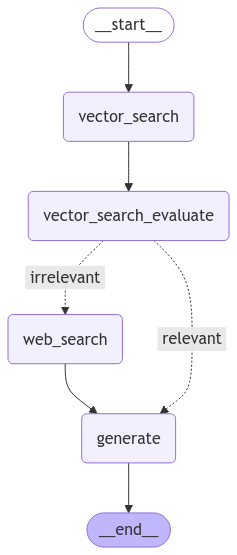

In [33]:
from IPython.display import Image, display

display(Image(x))